# Проект: Анализ поведения пользователей АНО "Простые вещи".

**Описание компании.**

Инклюзивные мастерские «Простые вещи» — это мастерские (столярная, швейная, керамическая, дизайн-бюро, кулинарная, арт-студия, цветочная), в которых трудятся взрослые люди с ментальными особенностями. Задача «Простых вещей» — сделать все возможное, чтобы люди с ментальными особенностями чувствовали себя частью общества, работали, общались и жили нормальную жизнь. «Простые вещи» подбирают для человека с ментальными особенностями программу трудоустройства или социальной занятости. Вместо отказов от работодателей человек получает выбор — семь мастерских, в которых можно работать и стать специалистом. Кроме того, получить навыки самостоятельной жизни: готовить, выбирать, распределять время, общаться, договариваться и строить отношения. 

**Описание проекта.**

АНО «Простые вещи» хотят усовершенствовать фандрайзинг организации – лучше понимать лояльную аудиторию, кто покупает продукцию мастерских, кто оставляет пожертвования, понять, как лучше выстраивать коммуникацию с этими целевыми аудиториями. 

Целью работы является разработка аналитической панели (dashboard), которая будет содержать информацию о поведении пользователей и их лояльности к простым вещам. 

**Задачи:**

- RFM-анализ;
- Когортный анализ;
- Маркетинговый анализ.

## Загрузка и предобработка данных.

In [1]:
# импорт библиотек
import pandas as pd
import yadisk
import numpy as np
import os
import xlrd
from tqdm import tqdm
from datetime import date,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go

In [3]:
def get_files_from_yadisk(app: str, secret: str, token: str) -> None:
    '''
    Функция для создания соединения с яндекс диском.
    Args:
        app (str): идентификатор приложения
        secret (str): секретный код приложения
        token (str): токен для работы с API яндекс диска
    Returns:
        yadisk._client.Client: клиент для работы с яндекс диском
    '''

    # создаем список файлов, которые мы будем загружать
    list_of_files = []
    # создаем список файлов для слияния
    files_to_merge = []

    # создаем подключения к яндекс диску
    y = yadisk.YaDisk(app, secret, token)

    # добавляем файлы в список файлов
    for el in tqdm(list(y.listdir('Простые_вещи'))):
            list_of_files.append(el['path'])

    # скачиваем файлы из списка файлов
    for file in tqdm(list_of_files):
        y.download(file.split(':')[1], file.split('/')[-1])

    # выбираем эксели в скачанных файлах
    for file in os.listdir():
        if file.endswith('.xls'):
            data = pd.read_excel(file)
            data['file'] = file
            # добавляем датасеты в список files to merge
            files_to_merge.append(data)

    # сливаю все датасеты в один
    df = pd.concat(files_to_merge)

    df.to_excel('correct_payments.xlsx')

In [4]:
get_files_from_yadisk(app_id, secret_id, ya_token)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.36it/s]


In [5]:
# открытие файла
df = pd.read_excel('correct_payments.xlsx', index_col=0)
df.head()

,Номер,Дата и время,Банк,Сайт,Номер заказа,Плательщик,Тип,Сумма операции,Валюта операции,Сумма комиссии,...,Дата рождения,Адрес.1,Комментарий,Case ID,Id платёжной формы,# заказа,ID плательщика,Валюта,Статус,Часовой пояс UTC/GMT
0,2111165778,2024-04-30 22:18:00,Тинькофф,prostieveschi.ru,NaN,tigro****@gmail.com,Регулярная оплата,200,RUB,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2111146897,2024-04-30 20:18:00,Тинькофф,prostieveschi.ru,NaN,12ost****@mail.ru,Регулярная оплата,1000,RUB,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2111124178,NaN,Тинькофф,prostieveschi.ru,17464423.0,lakoni****@mail.ru,Оплата,100,RUB,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2111085421,2024-04-30 14:54:00,Тинькофф,prostieveschi.ru,NaN,nat****@gmail.com,Регулярная оплата,300,RUB,9.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2111083746,2024-04-30 14:44:00,Тинькофф,prostieveschi.ru,NaN,natalk****@inbox.ru,Регулярная оплата,700,RUB,22.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# просмотр информации о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 334
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер                         4148 non-null   int64         
 1   Дата и время                  3496 non-null   object        
 2   Банк                          4148 non-null   object        
 3   Сайт                          4148 non-null   object        
 4   Номер заказа                  1281 non-null   float64       
 5   Плательщик                    3474 non-null   object        
 6   Тип                           4148 non-null   object        
 7   Сумма операции                4148 non-null   int64         
 8   Валюта операции               3475 non-null   object        
 9   Сумма комиссии                4086 non-null   float64       
 10  Сумма возмещения              4086 non-null   float64       
 11  Валюта возмещения             4

In [7]:
# удаляем пустые столбцы
df.dropna(how='all', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 334
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Номер                  4148 non-null   int64         
 1   Дата и время           3496 non-null   object        
 2   Банк                   4148 non-null   object        
 3   Сайт                   4148 non-null   object        
 4   Номер заказа           1281 non-null   float64       
 5   Плательщик             3474 non-null   object        
 6   Тип                    4148 non-null   object        
 7   Сумма операции         4148 non-null   int64         
 8   Валюта операции        3475 non-null   object        
 9   Сумма комиссии         4086 non-null   float64       
 10  Сумма возмещения       4086 non-null   float64       
 11  Валюта возмещения      4086 non-null   object        
 12  Дата возмещения        3413 non-null   datetime64[ns]
 13  Стат

In [8]:
pd.set_option('display.max_columns', None)
df.head()

,Номер,Дата и время,Банк,Сайт,Номер заказа,Плательщик,Тип,Сумма операции,Валюта операции,Сумма комиссии,Сумма возмещения,Валюта возмещения,Дата возмещения,Статус операции,Назначение платежа,% комиссии,Дата/время создания,Платежная система,Карта,Срок действия,Эмитент,Страна эмитента карты,Public ID,Адрес,Код,Примечание,file,Страна,Город,Подписка,RRN,Код авторизации,Способ оплаты,ID плательщика,Валюта,Статус,Часовой пояс UTC/GMT
0,2111165778,2024-04-30 22:18:00,Тинькофф,prostieveschi.ru,NaN,tigro****@gmail.com,Регулярная оплата,200,RUB,6.4,193.6,RUB,2024-05-02,Completed,"Поддержите ""Простые вещи""",3.2,2024-04-30 22:18:00,MIR,220070****8853,1931-03-01,Tinkoff Bank,RU,pk_1d533fc565aebdc2f43d9a29be0ca,prostieveschi.ru,0.0,Approved,апрель.xls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2111146897,2024-04-30 20:18:00,Тинькофф,prostieveschi.ru,NaN,12ost****@mail.ru,Регулярная оплата,1000,RUB,32.0,968.0,RUB,2024-05-02,Completed,"Поддержите ""Простые вещи""",3.2,2024-04-30 20:18:00,MasterCard,555957****4987,2024-11-01,Alfa-Bank,RU,pk_1d533fc565aebdc2f43d9a29be0ca,prostieveschi.ru,0.0,Approved,апрель.xls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2111124178,NaN,Тинькофф,prostieveschi.ru,17464423.0,lakoni****@mail.ru,Оплата,100,RUB,NaN,NaN,NaN,NaT,Declined,Пожертвование на ведение уставной деятельности,0.0,2024-04-30 18:17:00,MIR,220220****8029,2028-06-01,Sberbank,RU,pk_f76cf5c46ff89f1eed242ae634a20,prostieveschi.ru,3006.0,CheckResponseServiceUnavailable,апрель.xls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2111085421,2024-04-30 14:54:00,Тинькофф,prostieveschi.ru,NaN,nat****@gmail.com,Регулярная оплата,300,RUB,9.6,290.4,RUB,2024-05-02,Completed,"Поддержите ""Простые вещи""",3.2,2024-04-30 14:54:00,MasterCard,521324****8872,2025-02-01,Tinkoff Bank,RU,pk_1d533fc565aebdc2f43d9a29be0ca,prostieveschi.ru,0.0,Approved,апрель.xls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2111083746,2024-04-30 14:44:00,Тинькофф,prostieveschi.ru,NaN,natalk****@inbox.ru,Регулярная оплата,700,RUB,22.4,677.6,RUB,2024-05-02,Completed,"Поддержите ""Простые вещи""",3.2,2024-04-30 14:44:00,MasterCard,553691****2559,1930-02-01,Tinkoff Bank,RU,pk_1d533fc565aebdc2f43d9a29be0ca,prostieveschi.ru,0.0,Approved,апрель.xls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# удаляем ненужные для анализа столбцы
df = df.drop(df.columns[[12, 18, 19, 21, 22, 24, 27, 30, 31, 34, 36]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 334
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Номер                4148 non-null   int64         
 1   Дата и время         3496 non-null   object        
 2   Банк                 4148 non-null   object        
 3   Сайт                 4148 non-null   object        
 4   Номер заказа         1281 non-null   float64       
 5   Плательщик           3474 non-null   object        
 6   Тип                  4148 non-null   object        
 7   Сумма операции       4148 non-null   int64         
 8   Валюта операции      3475 non-null   object        
 9   Сумма комиссии       4086 non-null   float64       
 10  Сумма возмещения     4086 non-null   float64       
 11  Валюта возмещения    4086 non-null   object        
 12  Статус операции      3475 non-null   object        
 13  Назначение платежа   3475 non-null

In [10]:
# заполняем пропуски 
df['Статус операции'] = df['Статус операции'].fillna(df['Статус'])
df['Плательщик'] = df['Плательщик'].fillna(df['ID плательщика'])
df['Дата и время'] = df['Дата и время'].fillna(df['Дата/время создания'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 334
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Номер                4148 non-null   int64         
 1   Дата и время         3997 non-null   object        
 2   Банк                 4148 non-null   object        
 3   Сайт                 4148 non-null   object        
 4   Номер заказа         1281 non-null   float64       
 5   Плательщик           4147 non-null   object        
 6   Тип                  4148 non-null   object        
 7   Сумма операции       4148 non-null   int64         
 8   Валюта операции      3475 non-null   object        
 9   Сумма комиссии       4086 non-null   float64       
 10  Сумма возмещения     4086 non-null   float64       
 11  Валюта возмещения    4086 non-null   object        
 12  Статус операции      4148 non-null   object        
 13  Назначение платежа   3475 non-null

In [11]:
# удаляем дублирующиеся столбцы
df = df.drop(df.columns[[15, 24, 25]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 334
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Номер               4148 non-null   int64  
 1   Дата и время        3997 non-null   object 
 2   Банк                4148 non-null   object 
 3   Сайт                4148 non-null   object 
 4   Номер заказа        1281 non-null   float64
 5   Плательщик          4147 non-null   object 
 6   Тип                 4148 non-null   object 
 7   Сумма операции      4148 non-null   int64  
 8   Валюта операции     3475 non-null   object 
 9   Сумма комиссии      4086 non-null   float64
 10  Сумма возмещения    4086 non-null   float64
 11  Валюта возмещения   4086 non-null   object 
 12  Статус операции     4148 non-null   object 
 13  Назначение платежа  3475 non-null   object 
 14  % комиссии          4148 non-null   float64
 15  Платежная система   3475 non-null   object 
 16  Эмитент

In [12]:
# переименовываем столбцы
df.columns = ['id', 'action_date', 'bank', 'site', 'order_id', 'customer', 'type',
                    'operation_sum', 'operation_currency', 'comission_sum', 'final_sum', 'final_currency',
                    'status', 'aim', 'comission_perc', 'payment_system', 'issuer', 'adress', 'note', 
                    'file', 'city', 'subscription', 'payment_method']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 334
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4148 non-null   int64  
 1   action_date         3997 non-null   object 
 2   bank                4148 non-null   object 
 3   site                4148 non-null   object 
 4   order_id            1281 non-null   float64
 5   customer            4147 non-null   object 
 6   type                4148 non-null   object 
 7   operation_sum       4148 non-null   int64  
 8   operation_currency  3475 non-null   object 
 9   comission_sum       4086 non-null   float64
 10  final_sum           4086 non-null   float64
 11  final_currency      4086 non-null   object 
 12  status              4148 non-null   object 
 13  aim                 3475 non-null   object 
 14  comission_perc      4148 non-null   float64
 15  payment_system      3475 non-null   object 
 16  issuer 

In [13]:
# меняем типы данных
df['action_date'] = pd.to_datetime(df['action_date'], errors='coerce')
df['id'] = df['id'].astype('str')
df['order_id'] = df['order_id'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 334
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  4148 non-null   object        
 1   action_date         3828 non-null   datetime64[ns]
 2   bank                4148 non-null   object        
 3   site                4148 non-null   object        
 4   order_id            4148 non-null   object        
 5   customer            4147 non-null   object        
 6   type                4148 non-null   object        
 7   operation_sum       4148 non-null   int64         
 8   operation_currency  3475 non-null   object        
 9   comission_sum       4086 non-null   float64       
 10  final_sum           4086 non-null   float64       
 11  final_currency      4086 non-null   object        
 12  status              4148 non-null   object        
 13  aim                 3475 non-null   object       

In [14]:
df.sample(10)

,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,payment_system,issuer,adress,note,file,city,subscription,payment_method
299,2107067025,2024-04-10 19:46:00,Тинькофф,prostieveschi.ru,nan,f****@mail.ru,Регулярная оплата,1000,RUB,32.0,968.0,RUB,Completed,"Поддержите ""Простые вещи""",3.2,Visa,Sberbank,prostieveschi.ru,Approved,апрель.xls,NaN,NaN,NaN
267,2120776793,2024-06-23 11:16:00,Тинькофф,prostieveschi.ru,22428.0,an-net****@yandex.ru,Оплата,100,RUB,3.9,96.1,RUB,Completed,"Поддержите ""Простые вещи""",3.2,MIR,RNCB,prostieveschi.ru,Approved,июнь.xls,Севастополь,NaN,NaN
678,2111307324,2024-05-01 14:55:00,Тинькофф,prostieveschi.ru,nan,arakelova-****@mail.ru,Регулярная оплата,100,RUB,3.9,96.1,RUB,Completed,"Поддержите ""Простые вещи""",3.2,MIR,Sberbank,NaN,Approved,май.xls,NaN,sc_29ca4369ca2db98779fa8a0ae6e52,NaN
608,2123568524,2024-07-09 17:14:00,Тинькофф,prostieveschi.ru,22949.0,tutmo****@gmail.com,Оплата,1000,RUB,32.0,968.0,RUB,Completed,"Поддержите ""Простые вещи""",3.2,Visa,Sberbank,prostieveschi.ru,Approved,июль.xls,Санкт-Петербург,NaN,NaN
118,2108980219,2024-04-19 22:58:00,Тинькофф,prostieveschi.ru,nan,st.mar****@gmail.com,Регулярная оплата,300,RUB,0.5,-0.5,RUB,Declined,"Поддержите ""Простые вещи""",3.2,MasterCard,Sberbank,prostieveschi.ru,InsufficientFunds,апрель.xls,NaN,NaN,NaN
423,2124379598,2024-07-14 22:33:00,Тинькофф,prostieveschi.ru,nan,marindo****@gmail.com,Регулярная оплата,300,RUB,9.6,290.4,RUB,Completed,"Поддержите ""Простые вещи""",3.2,MasterCard,Tinkoff Bank,prostieveschi.ru,Approved,июль.xls,NaN,sc_11a219ffe4939e3829214db8a03c1,NaN
614,2112310006,2024-05-06 14:28:00,Тинькофф,prostieveschi.ru,20680.0,Wi****@me.com,Оплата,400,RUB,12.8,387.2,RUB,Completed,"Поддержите ""Простые вещи""",3.2,MasterCard,Raiffeisenbank,NaN,Approved,май.xls,NaN,NaN,NaN
511,2120194427,2024-06-19 18:43:00,Тинькофф,prostieveschi.ru,nan,mariaivc****@mail.ru,Регулярная оплата,500,RUB,16.0,484.0,RUB,Completed,"Поддержите ""Простые вещи""",3.2,Visa,Sberbank,prostieveschi.ru,Approved,июнь.xls,NaN,NaN,NaN
788,2122261615,2024-07-01 22:29:00,Тинькофф,prostieveschi.ru,nan,Kut_anast****@mail.ru,Регулярная оплата,2000,RUB,64.0,1936.0,RUB,Completed,"Поддержите ""Простые вещи""",3.2,Visa,Sberbank,prostieveschi.ru,Approved,июль.xls,NaN,sc_903ed5ecd77d6553ec7f9a6e13c44,NaN
466,2120538922,2024-06-21 19:23:00,Тинькофф,prostieveschi.ru,nan,lera-****@yandex.ru,Регулярная оплата,500,RUB,16.0,484.0,RUB,Completed,"Поддержите ""Простые вещи""",3.2,MIR,Tinkoff Bank,prostieveschi.ru,Approved,июнь.xls,NaN,NaN,NaN


In [15]:
# смотрим значения в категориальных столбцах
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].unique())

['2111165778' '2111146897' '2111124178' ... '2067494163' '2067091792'
 '2066541767']
['Тинькофф']
['prostieveschi.ru']
['nan' '17464423.0' '20598.0' ... '19650.0' '19639.0' '19638.0']
['tigro****@gmail.com' '12ost****@mail.ru' 'lakoni****@mail.ru' ...
 'k_olga@i****.ru' 'marusyail.ilyus****@ya.ru' 'tigri****@mail.ru']
['Регулярная оплата' 'Оплата' 'Оплата с созданием подписки']
['RUB' 'EUR' 'BYN' 'USD' nan]
['RUB' nan]
['Completed' 'Declined' 'Завершена' 'Отклонена']
['Поддержите "Простые вещи"'
 'Пожертвование на ведение уставной деятельности'
 'Поддержите &quot;Простые вещи&quot;'
 'пожертвование на ведение уставной деятельности' 'Вещи с особенностями'
 nan]
['MIR' 'MasterCard' 'Visa' 'JCB' 'Unknown' nan]
['Tinkoff Bank' 'Alfa-Bank' 'Sberbank'
 'Bank Otkritie Financial Corporation' 'Yandex Bank' 'LLC "BANK TOCHKA"'
 'ROSBANK' 'Sankt-Peterburg' 'Renessans Kredit' 'Raiffeisenbank'
 '"YooMoney", NBCO LLC' 'Citibank' 'REVOLUT LIMITED' 'VTB' 'SNGB'
 'Promsvyazbank' 'RNCB' 'AO "Kredit Evro

In [16]:
# чищу столбец цель в феврале - его там нет, поэтому пропуски
df['aim'] = df.aim.replace('Завершена', np.NaN)
df['aim'] = df.aim.replace('Отклонена', np.NaN)
# привожу значения в столбцах цель и статус к одному виду (убираю дубликаты)
df.aim = df.aim.str.replace('&quot;', '"').str.replace('пожертвование', 'Пожертвование')
df.status = df.status.str.replace('Completed', 'Завершена').str.replace('Declined', 'Отклонена')
# привожу значения к нижнему регистру
df.note = df.note.str.lower()
# заполняю пустые ячейки в столбце final_currency
df.final_currency = df.final_currency.fillna('RUB')

In [17]:
# смотрим значения в категориальных столбцах
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].unique())

['2111165778' '2111146897' '2111124178' ... '2067494163' '2067091792'
 '2066541767']
['Тинькофф']
['prostieveschi.ru']
['nan' '17464423.0' '20598.0' ... '19650.0' '19639.0' '19638.0']
['tigro****@gmail.com' '12ost****@mail.ru' 'lakoni****@mail.ru' ...
 'k_olga@i****.ru' 'marusyail.ilyus****@ya.ru' 'tigri****@mail.ru']
['Регулярная оплата' 'Оплата' 'Оплата с созданием подписки']
['RUB' 'EUR' 'BYN' 'USD' nan]
['RUB']
['Завершена' 'Отклонена']
['Поддержите "Простые вещи"'
 'Пожертвование на ведение уставной деятельности' 'Вещи с особенностями'
 nan]
['MIR' 'MasterCard' 'Visa' 'JCB' 'Unknown' nan]
['Tinkoff Bank' 'Alfa-Bank' 'Sberbank'
 'Bank Otkritie Financial Corporation' 'Yandex Bank' 'LLC "BANK TOCHKA"'
 'ROSBANK' 'Sankt-Peterburg' 'Renessans Kredit' 'Raiffeisenbank'
 '"YooMoney", NBCO LLC' 'Citibank' 'REVOLUT LIMITED' 'VTB' 'SNGB'
 'Promsvyazbank' 'RNCB' 'AO "Kredit Evropa Bank (Rossiya)".' 'QIWI Bank'
 'Gazprombank' 'Bank Zenit' 'Post Bank' nan 'T-Bank (Tinkoff)'
 'BANK ROSSIYA' 'Sov

Проверим наличие дубликатов.

In [18]:
print('\nЧисло дубликатов:', df.duplicated().sum())


Число дубликатов: 0


In [19]:
# проверяем количество пропусков
df.isnull().sum()

id                       0
action_date            320
bank                     0
site                     0
order_id                 0
customer                 1
type                     0
operation_sum            0
operation_currency     673
comission_sum           62
final_sum               62
final_currency           0
status                   0
aim                    673
comission_perc           0
payment_system         673
issuer                 678
adress                1361
note                   699
file                     0
city                  3374
subscription          2910
payment_method        3858
dtype: int64

In [20]:
# удаляем строку с пропуском в столбце customer
df = df.dropna(subset=['customer'])

In [21]:
# заполняем пропуски в столбцах order_id и aim значением "не определен"
for column in ['order_id', 'aim']:
    df[column] = df[column].fillna('не определен')

In [22]:
# проверяем статус транзакций в строках с пропусками в дате
action_date_isnull = df[df['action_date'].isnull()]
action_date_isnull['status'].unique()

array(['Отклонена'], dtype=object)

Во всех строках с пропусками в дате статус 'Отклонена'.

In [23]:
# проверяем статус транзакций в строках с валютой 'EUR','BYN','USD' 
operation_currency_not_rub = df.query("operation_currency == ['EUR','BYN','USD']")
operation_currency_not_rub['status'].unique()

array(['Отклонена'], dtype=object)

Во всех строках с валютой 'EUR','BYN','USD' статус 'Отклонена'.

Для дальнейшего анализа будут взяты строки со статусом транзакции 'Завершена'. Строки со статусом 'Отклонена' оставим в датафрейме для оценки доли отклоненных платежей.

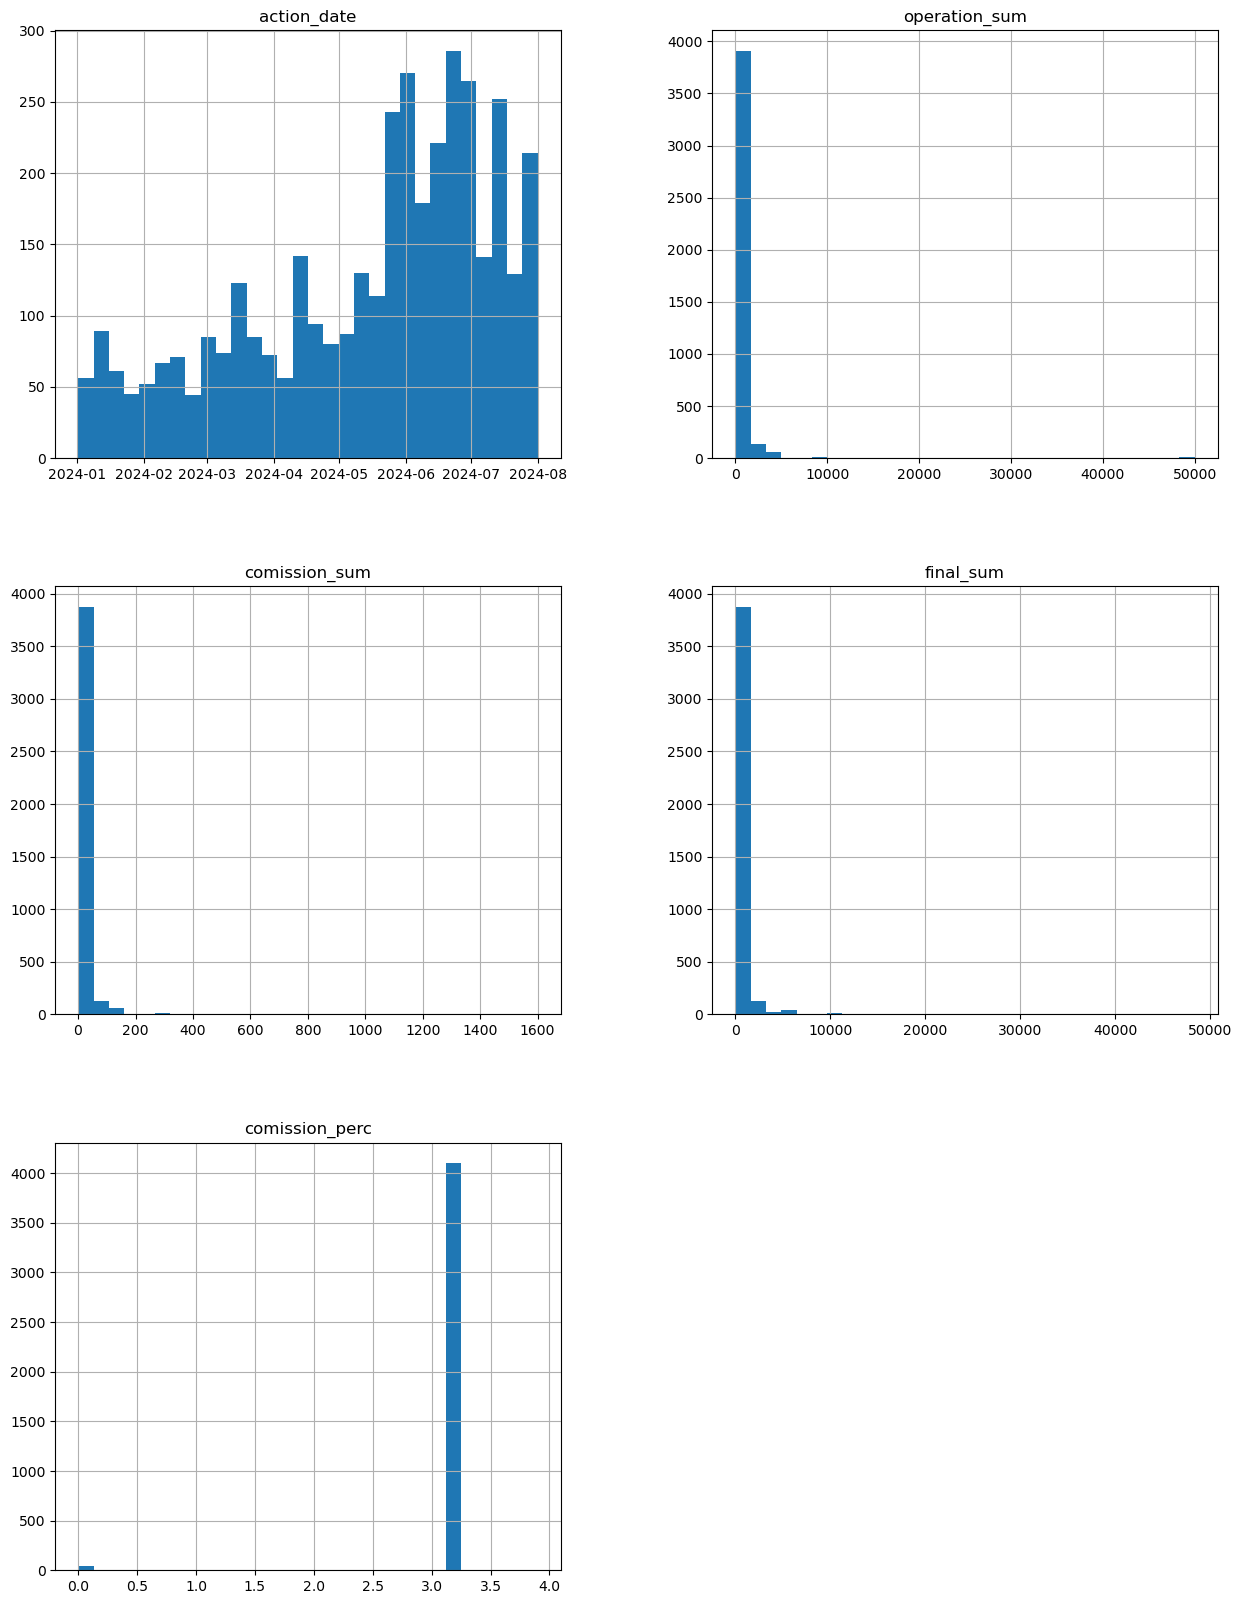

In [24]:
# смотрим значения в количественных столбцах
df.hist(bins=30, figsize=(15, 20))
plt.show()

Судя по представленным гистограммам датафрейм содержим данные с января по июль 2024. Большая часть транзакций с суммой до 2000 руб., но есть несколько крупных платежей в 50000 руб. Сумма комиссии в основном до 50 руб. Финальная сумма соответствует общей сумме транзакций. Процент комиссии в основном составляет 3.2%. Таким образом выбивающихся значений нет.

## Исследовательский анализ данных.

In [25]:
df['action_date'].max()

Timestamp('2024-07-31 21:34:00')

In [26]:
df['action_date'].min()

Timestamp('2024-01-01 09:55:00')

Данные представлены в период с 1ого января по 31ое июля 2024 года.

In [27]:
print('\nВсего пользователей:', len(df['customer'].unique()))


Всего пользователей: 1525


In [28]:
print('\nВсего транзакций:', len(df['id'].unique()))


Всего транзакций: 4147


In [29]:
print('\nОбщая сумма поступивших денежных средств (руб.):', df['final_sum'].sum())


Общая сумма поступивших денежных средств (руб.): 2457932.2


Рассмотрим распределение транзакций по *типу платежа (столбец "type")*.

In [30]:
# создаем сводную таблицу по типу платежа
df_type = (df.groupby('type').agg({'customer':'count', 'final_sum':['sum', 'mean']}))
df_type.columns = ['count_of_users','sum', 'mean']
df_type['mean'] = round(df_type['mean'])
df_type['ratio'] = round(df_type['count_of_users'] / df_type['count_of_users'].sum(), 2)

df_type

,count_of_users,sum,mean,ratio
type,,,,
Оплата,836,1034670.13,1333.0,0.20
Оплата с созданием подписки,454,329256.84,725.0,0.11
Регулярная оплата,2857,1094005.23,383.0,0.69


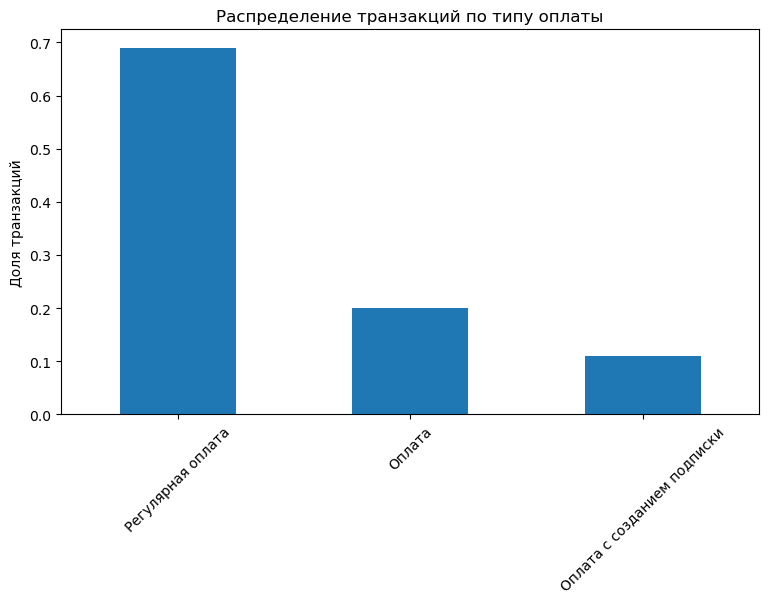

In [31]:
df_type = df_type.reset_index()
# создаем график, отображающий распределение транзакций по типу оплаты
(df_type.sort_values(by='count_of_users', ascending=False)
    .plot(kind='bar', figsize=(9, 5), x='type', y='ratio', title='Распределение транзакций по типу оплаты', 
          legend = False))
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('Доля транзакций')
plt.show()

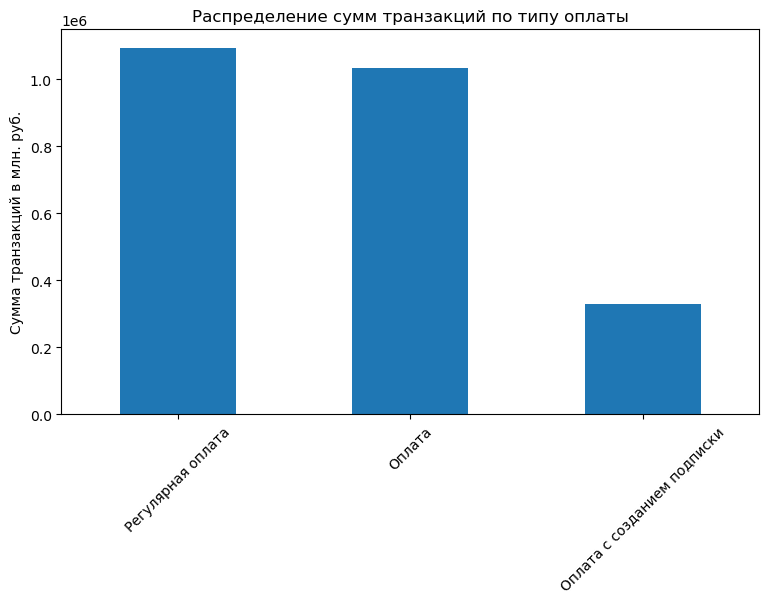

In [32]:
# создаем график, отображающий распределение сумм транзакций по типу оплаты
(df_type.sort_values(by='count_of_users', ascending=False)
    .plot(kind='bar', figsize=(9, 5), x='type', y='sum', title='Распределение сумм транзакций по типу оплаты', 
          legend = False))
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('Сумма транзакций в млн. руб.')
plt.show()

Регулярная оплата составляет 69% от общего количества платежей. При этом в среднем это самый невысокий платеж. Тип "Оплата" составляет 20%, при этом общая сумма транзакций по этому типу сопоставима с общей суммой регулярных оплат.

Рассмотрим распределение транзакций по *цели платежа (столбец "aim").*

In [33]:
# создаем сводную таблицу по цели платежа
df_aim = (df.groupby('aim').agg({'customer':'count', 'final_sum':['sum', 'mean']}))
df_aim.columns = ['count_of_users','sum', 'mean']
df_aim['mean'] = round(df_aim['mean'])
df_aim['ratio'] = round(df_aim['count_of_users'] / df_aim['count_of_users'].sum(), 3)

df_aim

,count_of_users,sum,mean,ratio
aim,,,,
Вещи с особенностями,7,93.10,13.0,0.002
"Поддержите ""Простые вещи""",3427,2204353.24,653.0,0.826
Пожертвование на ведение уставной деятельности,40,6088.40,225.0,0.010
не определен,673,247397.46,368.0,0.162


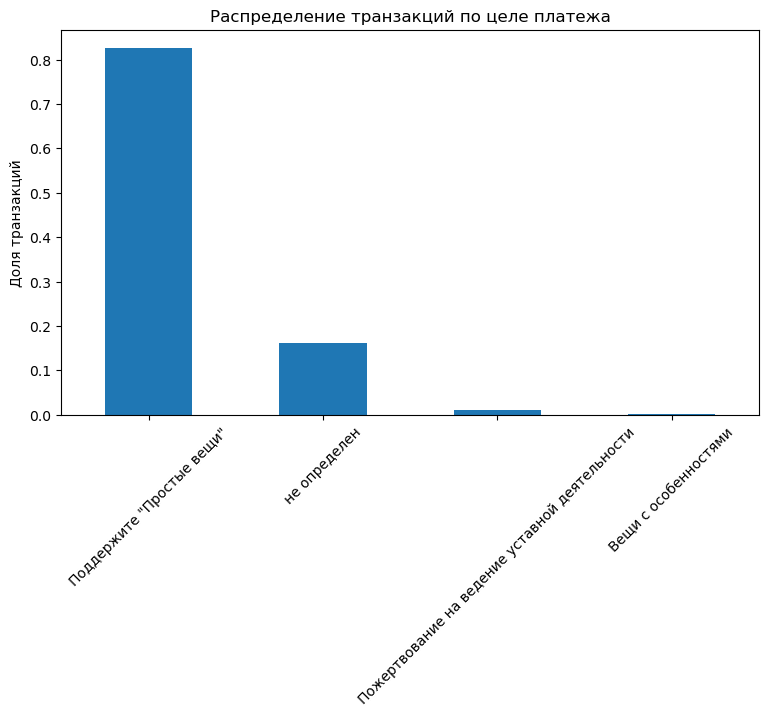

In [34]:
df_aim = df_aim.reset_index()
# создаем график, отображающий распределение транзакций по целе платежа
(df_aim.sort_values(by='count_of_users', ascending=False)
    .plot(kind='bar', figsize=(9, 5), x='aim', y='ratio', title='Распределение транзакций по целе платежа', 
          legend = False))
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('Доля транзакций')
plt.show()

Наибольшая часть платежей приходится на цель "Поддержите "Простые вещи"" (около 82%). Также у данной категории наибольшая средняя величина платежа.

Рассмотрим распределение транзакций по *городам (столбец "city").*

In [35]:
# создаем сводную таблицу по городам
df_city = (df.groupby('city').agg({'customer':'count', 'final_sum':['sum', 'mean']}))
df_city.columns = ['count_of_users','sum', 'mean']
df_city['mean'] = round(df_city['mean'])
df_city['ratio'] = round(df_city['count_of_users'] / df_city['count_of_users'].sum(), 3)

df_city_count = df_city.sort_values(by='count_of_users', ascending=False).head(10)
df_city_count

,count_of_users,sum,mean,ratio
city,,,,
Москва,246,288037.70,1195.0,0.318
Санкт-Петербург,186,166635.64,931.0,0.240
Екатеринбург,14,11390.30,814.0,0.018
Вена,11,14619.50,1827.0,0.014
Краснодар,11,10645.90,968.0,0.014
Тбилиси,9,3638.68,455.0,0.012
Ростов-на-Дону,8,5613.70,702.0,0.010
Нижний Новгород,7,5324.00,761.0,0.009
Новосибирск,7,3774.50,539.0,0.009


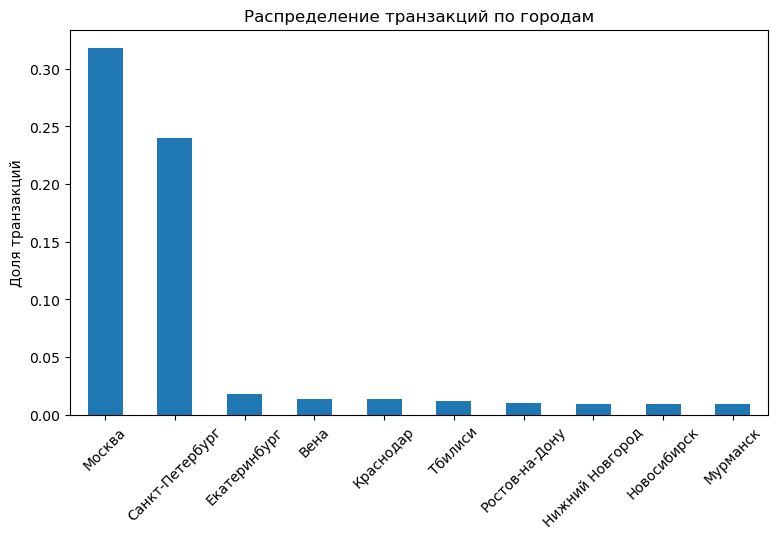

In [36]:
df_city_count = df_city_count.reset_index()
# создаем график, отображающий распределение транзакций по городам
(df_city_count.sort_values(by='count_of_users', ascending=False)
    .plot(kind='bar', figsize=(9, 5), x='city', y='ratio', title='Распределение транзакций по городам', 
          legend = False))
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('Доля транзакций')
plt.show()

Наибольшее количество платежей приходится на Москву и Санкт-Петербург (31% и 24% соответственно).

Отсортируем таблицу по среднему размеру платежа.

In [37]:
df_city_mean = df_city.sort_values(by='mean', ascending=False).head(15)
df_city_mean

,count_of_users,sum,mean,ratio
city,,,,
Лиссабон,1,48400.00,48400.0,0.001
Бирмингем,2,10164.00,5082.0,0.003
Альтусрид,1,4840.00,4840.0,0.001
Petah Tikva,1,2904.00,2904.0,0.001
Дубай,3,6776.00,2259.0,0.004
Ришон-ле-Цион,1,1936.00,1936.0,0.001
Черкесск,1,1858.56,1859.0,0.001
Варшава,2,3678.40,1839.0,0.003
Вена,11,14619.50,1827.0,0.014


Из таблицы выше видно, что наиболее высокие средние платежи приходятся на зарубежные города. 

Рассмотрим распределение транзакций в зависимости от *наличия подписки (столбец "subscription").*

In [38]:
# функция для проверки есть ли подписка
def check_subscription_status(cell):
    if pd.isna(cell):
        return "нет подписки"
    else:
        return "есть подписка"        

In [39]:
# дублирую датафрейм и добавляю столбец с признаком наличия подписки
df_subscription = df
df_subscription['sub'] = df_subscription['subscription'].apply(check_subscription_status)
df_subscription.head()

,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,payment_system,issuer,adress,note,file,city,subscription,payment_method,sub
0,2111165778,2024-04-30 22:18:00,Тинькофф,prostieveschi.ru,nan,tigro****@gmail.com,Регулярная оплата,200,RUB,6.4,193.6,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MIR,Tinkoff Bank,prostieveschi.ru,approved,апрель.xls,NaN,NaN,NaN,нет подписки
1,2111146897,2024-04-30 20:18:00,Тинькофф,prostieveschi.ru,nan,12ost****@mail.ru,Регулярная оплата,1000,RUB,32.0,968.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Alfa-Bank,prostieveschi.ru,approved,апрель.xls,NaN,NaN,NaN,нет подписки
2,2111124178,2024-04-30 18:17:00,Тинькофф,prostieveschi.ru,17464423.0,lakoni****@mail.ru,Оплата,100,RUB,NaN,NaN,RUB,Отклонена,Пожертвование на ведение уставной деятельности,0.0,MIR,Sberbank,prostieveschi.ru,checkresponseserviceunavailable,апрель.xls,NaN,NaN,NaN,нет подписки
3,2111085421,2024-04-30 14:54:00,Тинькофф,prostieveschi.ru,nan,nat****@gmail.com,Регулярная оплата,300,RUB,9.6,290.4,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Tinkoff Bank,prostieveschi.ru,approved,апрель.xls,NaN,NaN,NaN,нет подписки
4,2111083746,2024-04-30 14:44:00,Тинькофф,prostieveschi.ru,nan,natalk****@inbox.ru,Регулярная оплата,700,RUB,22.4,677.6,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Tinkoff Bank,prostieveschi.ru,approved,апрель.xls,NaN,NaN,NaN,нет подписки


In [40]:
# создаем сводную таблицу по наличию подписки
df_sub = (df_subscription.groupby('sub').agg({'customer':'count', 'final_sum':['sum', 'mean']}))
df_sub.columns = ['count_of_users','sum', 'mean']
df_sub['mean'] = round(df_sub['mean'])
df_sub['ratio'] = round(df_sub['count_of_users'] / df_sub['count_of_users'].sum(), 2)

df_sub

,count_of_users,sum,mean,ratio
sub,,,,
есть подписка,1238,521011.28,421.0,0.3
нет подписки,2909,1936920.92,680.0,0.7


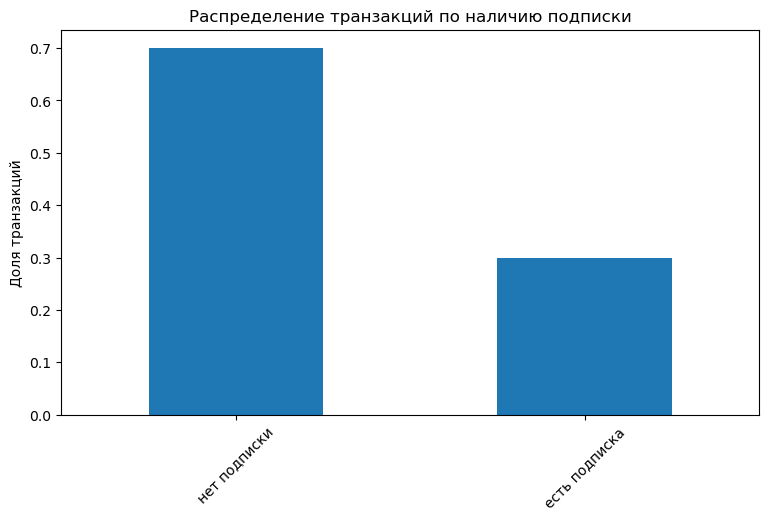

In [41]:
df_sub = df_sub.reset_index()
# создаем график, отображающий распределение транзакций по наличию подписки
(df_sub.sort_values(by='count_of_users', ascending=False)
    .plot(kind='bar', figsize=(9, 5), x='sub', y='ratio', title='Распределение транзакций по наличию подписки', 
          legend = False))
plt.xticks(rotation = 45)
plt.xlabel('')
plt.ylabel('Доля транзакций')
plt.show()

Основное количество платежей (около 70%) совершают пользователи без подписки. При этом средняя величина платежа также выше.

Рассмотрим распределение транзакций по *статусу (столбец "status").*

In [42]:
# создаем сводную таблицу по статусу платежа
df_status = (df.groupby('status').agg({'customer':'count'}))
df_status.columns = ['count_of_users']
df_status['ratio'] = df_status['count_of_users'] / df_status['count_of_users'].sum()
df_status.ratio = df_status.ratio.apply(lambda x: format(x,'.2%'))

df_status

,count_of_users,ratio
status,,
Завершена,3326,80.20%
Отклонена,821,19.80%


Отклоненных платежей около 20%, это очень много. Посмотрим по какому типу платежа наиболее часто происходит отмена.

In [43]:
# выбираем строки со статусом "Отклонена"
df_not_paid = df[df['status'] == 'Отклонена']

# создаем сводную таблицу по типу платежа для отмененных 
df_not_paid_type = (df_not_paid.groupby('type').agg({'customer':'count'}))
df_not_paid_type.columns = ['count_of_users']
df_not_paid_type['ratio'] = df_not_paid_type['count_of_users'] / df_not_paid_type['count_of_users'].sum()
df_not_paid_type.ratio = df_not_paid_type.ratio.apply(lambda x: format(x,'.2%'))
df_not_paid_type = df_not_paid_type.sort_values(by='ratio', ascending=False).reset_index()

df_not_paid_type

,type,count_of_users,ratio
0,Регулярная оплата,707,86.11%
1,Оплата,114,13.89%


Основной тип платежа для отмененных - регулярная оплата (86%). Посмотрим на причины отклонения платежа.

In [44]:
# создаем сводную таблицу по причине отказа
df_note = (df_not_paid.groupby('note').agg({'customer':'count'}))
df_note.columns = ['count_of_users']
df_note['ratio'] = round(df_note['count_of_users'] / df_note['count_of_users'].sum(), 2)
df_note = df_note.sort_values(by='ratio', ascending=False).reset_index()

df_note

,note,count_of_users,ratio
0,insufficientfunds,485,0.77
1,unabletoprocess,39,0.06
2,exceedwithdrawalfrequency,23,0.04
3,expiredcard,28,0.04
4,authenticationfailed,12,0.02
5,checkresponseformaterror,8,0.01
6,checkresponseserviceunavailable,6,0.01
7,incorrectcvv,8,0.01
8,invalidcardnumber,8,0.01
9,pickupcard,3,0.00


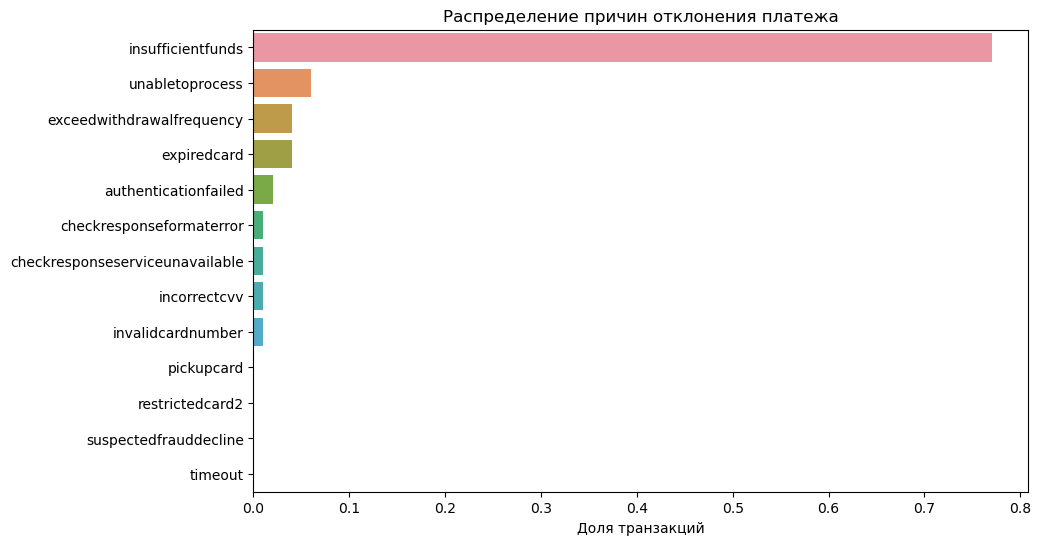

In [45]:
# создаем график, отображающий распределение причин отклонения платежа
plt.figure(figsize = (10,6))
sns.barplot(x='ratio', y='note', data=df_note)
plt.title('Распределение причин отклонения платежа')
plt.xlabel('Доля транзакций')
plt.ylabel('')
plt.show()

Основная причина отказа - "недостаток средств" (77%), далее - "не удается обработать" (6%), "карта с истекшим сроком действия" и "превышен лимит операций по карте" - (4%).

## RFM анализ.

*RFM-анализ (Recency, Frequency, Monetary)* — это метод сегментации клиентской базы по потребительскому поведению. Его цель — выделить ключевых клиентов, которые приносят компании большую часть прибыли. 

Основные параметры RFM-анализа: 

*Recency (давность).* Время, которое прошло с момента последней покупки. По этому критерию отслеживают новичков — тех, кто впервые недавно воспользовался товаром или услугой. 

*Frequency (частота).* Как часто клиент покупает в заданный промежуток времени. Этот параметр помогает выявить постоянных покупателей. 

*Monetary (деньги).* Сколько покупатель потратил на услуги компании. Чем выше показатель, тем больше денег компания получила от потребителя.


В данном анализе будет использовано три ранга для R, F, M: 1, 2, 3. 

Период для R сегментируем следующим образом: до 30 дней включительно - ранг 3, от 31 до 90 дней включительно - ранг 2, 90+ дней - ранг 1.

Для F и M диапазоны сегментов будут определены функцией cut().

In [46]:
# берем строки со статусом 'Завершена'
df_paid = df[df['status'] == 'Завершена']
df_paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3326 entries, 0 to 255
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  3326 non-null   object        
 1   action_date         3326 non-null   datetime64[ns]
 2   bank                3326 non-null   object        
 3   site                3326 non-null   object        
 4   order_id            3326 non-null   object        
 5   customer            3326 non-null   object        
 6   type                3326 non-null   object        
 7   operation_sum       3326 non-null   int64         
 8   operation_currency  2822 non-null   object        
 9   comission_sum       3326 non-null   float64       
 10  final_sum           3326 non-null   float64       
 11  final_currency      3326 non-null   object        
 12  status              3326 non-null   object        
 13  aim                 3326 non-null   object       

In [47]:
max_date = df_paid['action_date'].max() + timedelta(days=1)
# считаем Recency (давность покупки) в днях
df_paid['recency'] = (max_date - df_paid['action_date']).dt.days

df_paid.sample(5)

C:\Users\Ирина\AppData\Local\Temp\ipykernel_10432\986946616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paid['recency'] = (max_date - df_paid['action_date']).dt.days


,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,payment_system,issuer,adress,note,file,city,subscription,payment_method,sub,recency
706,2119141937,2024-06-13 11:24:00,Тинькофф,prostieveschi.ru,21911.0,Knys****@gmail.com,Оплата с созданием подписки,2000,RUB,64.0,1936.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Tinkoff Bank,prostieveschi.ru,approved,июнь.xls,Санкт-Петербург,NaN,NaN,нет подписки,49
2,2079851261,2024-01-30 14:55:00,Тинькофф,prostieveschi.ru,nan,nat****@gmail.com,Регулярная оплата,300,NaN,9.6,290.4,RUB,Завершена,не определен,3.2,NaN,NaN,NaN,NaN,январь.xls,NaN,NaN,NaN,нет подписки,184
314,2097677969,2024-03-09 16:34:00,Тинькофф,prostieveschi.ru,nan,sas****@yandex.ru,Регулярная оплата,500,RUB,16.0,484.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Raiffeisenbank,prostieveschi.ru,approved,март.xls,NaN,NaN,NaN,нет подписки,145
158,2121422897,2024-06-27 07:33:00,Тинькофф,prostieveschi.ru,22553.0,o.avraa****@mail.ru,Оплата,1000,RUB,32.0,968.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MIR,Sberbank,prostieveschi.ru,approved,июнь.xls,Москва,NaN,NaN,нет подписки,35
106,2087523555,2024-02-15 12:13:00,Тинькофф,prostieveschi.ru,nan,elina.min****@gmail.com,Регулярная оплата,300,NaN,9.6,290.4,RUB,Завершена,не определен,3.2,NaN,NaN,NaN,NaN,февраль.xls,NaN,NaN,NaN,нет подписки,168


In [48]:
# считаем Frequency (частота покупок в месяц)
frequency_data = df_paid.groupby('customer')['order_id'].count().reset_index()
frequency_data.rename(columns = {'order_id' : 'frequency'}, inplace = True)
frequency_data['frequency'] = frequency_data['frequency'] / 7
df_paid = df_paid.merge(frequency_data, on = 'customer', how = 'left')

df_paid.sample(5)

,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,payment_system,issuer,adress,note,file,city,subscription,payment_method,sub,recency,frequency
3044,2081859574,2024-02-03 16:45:00,Тинькофф,prostieveschi.ru,nan,vassily.shul****@gmail.com,Регулярная оплата,2000,NaN,64.0,1936.0,RUB,Завершена,не определен,3.2,NaN,NaN,NaN,NaN,февраль.xls,NaN,NaN,NaN,нет подписки,180,0.857143
2374,2113878909,2024-05-14 03:09:00,Тинькофф,prostieveschi.ru,nan,juliett****@gmail.com,Регулярная оплата,300,RUB,9.6,290.4,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,Visa,Sberbank,NaN,approved,май.xls,NaN,sc_1f8f50b62cfffff035798df752d98,NaN,есть подписка,79,1.000000
2911,2088453006,2024-02-17 08:51:00,Тинькофф,prostieveschi.ru,nan,elenabykova****@gmail.com,Регулярная оплата,500,NaN,16.0,484.0,RUB,Завершена,не определен,3.2,NaN,NaN,NaN,NaN,февраль.xls,NaN,NaN,NaN,нет подписки,166,1.000000
735,2123767602,2024-07-10 23:09:00,Тинькофф,prostieveschi.ru,nan,litvinovaa.al****@gmail.com,Регулярная оплата,100,RUB,3.9,96.1,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Tinkoff Bank,prostieveschi.ru,approved,июль.xls,NaN,sc_2f66e03f01eea14a79caa024b9db4,NaN,есть подписка,21,1.000000
906,2122386372,2024-07-02 16:55:00,Тинькофф,prostieveschi.ru,nan,Ekhisa****@gmail.com,Регулярная оплата,1000,RUB,32.0,968.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MIR,Sberbank,prostieveschi.ru,approved,июль.xls,NaN,sc_29e374494aaff54e82dd7eba967ce,NaN,есть подписка,30,0.428571


In [49]:
# считаем Monetary (сумма покупок)
monetary_data = df_paid.groupby('customer')['operation_sum'].sum().reset_index()
monetary_data.rename(columns = {'operation_sum' : 'monetary_value'}, inplace = True)
df_paid = df_paid.merge(monetary_data, on = 'customer', how = 'left')

df_paid.sample(5)

,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,payment_system,issuer,adress,note,file,city,subscription,payment_method,sub,recency,frequency,monetary_value
147,2107696711,2024-04-13 20:07:00,Тинькофф,prostieveschi.ru,nan,fly****@gmail.com,Регулярная оплата,500,RUB,16.0,484.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,Visa,Sberbank,prostieveschi.ru,approved,апрель.xls,NaN,NaN,NaN,нет подписки,110,0.714286,2500
1429,2119835901,2024-06-17 14:41:00,Тинькофф,prostieveschi.ru,22095.0,glebova.ell****@gmail.com,Оплата с созданием подписки,1000,RUB,32.0,968.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MIR,Tinkoff Bank,prostieveschi.ru,approved,июнь.xls,Дубай,NaN,NaN,нет подписки,45,0.285714,2000
235,2105917757,2024-04-05 14:25:00,Тинькофф,prostieveschi.ru,20248.0,bonus.dee****@gmail.com,Оплата,300,RUB,9.6,290.4,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Tinkoff Bank,prostieveschi.ru,approved,апрель.xls,NaN,NaN,NaN,нет подписки,118,2.285714,4800
397,2126472817,2024-07-27 16:39:00,Тинькофф,prostieveschi.ru,nan,zeropaperw****@gmail.com,Регулярная оплата,100,RUB,3.9,96.1,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,T-Bank (Tinkoff),prostieveschi.ru,approved,июль.xls,NaN,sc_b1b372154c434ae3d50ffc7128d06,Tinkoff Pay,есть подписка,5,0.428571,300
1238,2120659025,2024-06-22 15:40:00,Тинькофф,prostieveschi.ru,22355.0,m.vitia****@mail.ru,Оплата,1000,RUB,32.0,968.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,Visa,ROSBANK,prostieveschi.ru,approved,июнь.xls,Москва,NaN,NaN,нет подписки,40,0.142857,1000


Визуализация распределения RFM-метрик:

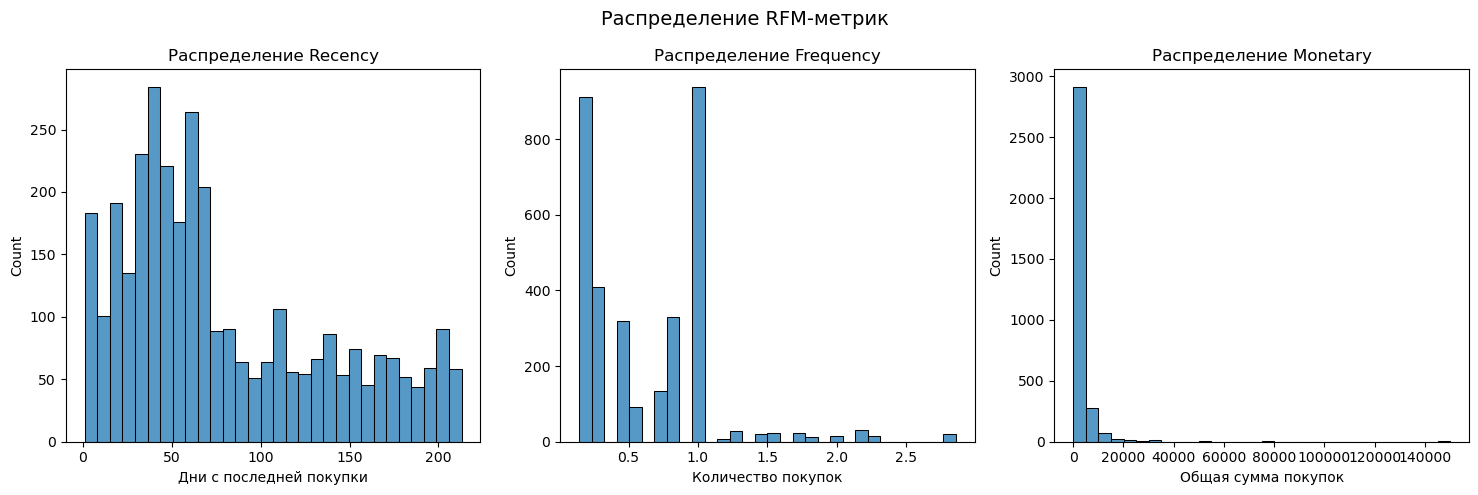

In [50]:
def plot_rfm_distributions(df_paid):
    """
    Визуализация распределения RFM-метрик
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Распределение RFM-метрик', fontsize=14)
    
    # Recency
    sns.histplot(data=df_paid, x='recency', bins=30, ax=axes[0])
    axes[0].set_title('Распределение Recency')
    axes[0].set_xlabel('Дни с последней покупки')
    
    # Frequency
    sns.histplot(data=df_paid, x='frequency', bins=30, ax=axes[1])
    axes[1].set_title('Распределение Frequency')
    axes[1].set_xlabel('Количество покупок')
    
    # Monetary
    sns.histplot(data=df_paid, x='monetary_value', bins=30, ax=axes[2])
    axes[2].set_title('Распределение Monetary')
    axes[2].set_xlabel('Общая сумма покупок')
    
    plt.tight_layout()
    return fig

# Создаем визуализацию
rfm_dist_plot = plot_rfm_distributions(df_paid)

- Самый распространенный интервал между платежами составляет от 30 до 60 дней. 
- Среднее число платежей в месяц составляет от 0.25 до 1.
- Наиболее частая сумма покупок находится в диапазоне до 5000 руб.

In [51]:
# устанавливаем диапазоны сегментирования для recency
def recency_scores(recency):
    try:
        if 0 <= recency <= 30:
            return '3'
        elif 31 <= recency <= 90:
            return '2'
        elif recency >= 91:
            return '1'
    except:
        pass

In [52]:
# добавляем столбец с сегментом recency_score
df_paid['recency_score'] = df_paid['recency'].apply(recency_scores)

In [53]:
# устанавливаем сегменты для frequency и monetary
frequency_scores = [1,2,3]
monetary_scores = [1,2,3]

In [54]:
# добавляем столбцы с сегментом frequency_score и monetary_score 
df_paid['frequency_score'] = pd.cut(df_paid['frequency'], bins = 3, labels = frequency_scores)
df_paid['monetary_score'] = pd.cut(df_paid['monetary_value'], bins = 3, labels = monetary_scores)

In [55]:
# смотрим на какие диапазоны разделены данные в frequency
pd.cut(df_paid['frequency'], bins = 3)

0       (0.14, 1.048]
1       (0.14, 1.048]
2       (0.14, 1.048]
3       (0.14, 1.048]
4       (0.14, 1.048]
            ...      
3321    (0.14, 1.048]
3322    (0.14, 1.048]
3323    (0.14, 1.048]
3324    (0.14, 1.048]
3325    (0.14, 1.048]
Name: frequency, Length: 3326, dtype: category
Categories (3, interval[float64, right]): [(0.14, 1.048] < (1.048, 1.952] < (1.952, 2.857]]

In [56]:
# смотрим на какие диапазоны разделены данные в monetary_value
pd.cut(df_paid['monetary_value'], bins = 3)

0       (-139.99, 50006.667]
1       (-139.99, 50006.667]
2       (-139.99, 50006.667]
3       (-139.99, 50006.667]
4       (-139.99, 50006.667]
                ...         
3321    (-139.99, 50006.667]
3322    (-139.99, 50006.667]
3323    (-139.99, 50006.667]
3324    (-139.99, 50006.667]
3325    (-139.99, 50006.667]
Name: monetary_value, Length: 3326, dtype: category
Categories (3, interval[float64, right]): [(-139.99, 50006.667] < (50006.667, 100003.333] < (100003.333, 150000.0]]

In [57]:
# преобразуем frequency_score и monetary_score в целочисленное значение
df_paid['frequency_score'] = df_paid['frequency_score'].astype(str)
df_paid['monetary_score'] = df_paid['monetary_score'].astype(str)

In [58]:
df_paid.sample(10)

,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,payment_system,issuer,adress,note,file,city,subscription,payment_method,sub,recency,frequency,monetary_value,recency_score,frequency_score,monetary_score
1031,2121561487,2024-06-27 23:15:00,Тинькофф,prostieveschi.ru,nan,nextl****@mail.ru,Регулярная оплата,100,RUB,3.9,96.1,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Tinkoff Bank,prostieveschi.ru,approved,июнь.xls,NaN,NaN,NaN,нет подписки,34,1.000000,700,2,1,1
96,2108597420,2024-04-18 05:43:00,Тинькофф,prostieveschi.ru,nan,ramens8****@mail.ru,Регулярная оплата,500,RUB,16.0,484.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MIR,VTB,prostieveschi.ru,approved,апрель.xls,NaN,NaN,NaN,нет подписки,105,0.142857,500,1,1,1
1545,2119208707,2024-06-13 18:33:00,Тинькофф,prostieveschi.ru,21933.0,****@bk.ru,Оплата с созданием подписки,1000,RUB,32.0,968.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MIR,Sberbank,prostieveschi.ru,approved,июнь.xls,Новосибирск,NaN,NaN,нет подписки,49,0.142857,1000,2,1,1
349,2126623914,2024-07-28 15:14:00,Тинькофф,prostieveschi.ru,nan,dsviri****@gmail.com,Регулярная оплата,500,RUB,16.0,484.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Alfa-Bank,prostieveschi.ru,approved,июль.xls,NaN,sc_c13692e78b3a9adb04d02fdbc50ae,NaN,есть подписка,4,1.000000,3500,3,1,1
2753,2097658181,2024-03-09 15:26:00,Тинькофф,prostieveschi.ru,nan,karmilovamarga****@gmail.com,Регулярная оплата,500,RUB,16.0,484.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Alfa-Bank,prostieveschi.ru,approved,март.xls,NaN,NaN,NaN,нет подписки,145,1.000000,3500,1,1,1
301,2126961376,2024-07-30 16:16:00,Тинькофф,prostieveschi.ru,nan,lry****@gmail.com,Регулярная оплата,500,RUB,16.0,484.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Raiffeisenbank,prostieveschi.ru,approved,июль.xls,NaN,sc_b375a823d841c4429aced8ba73ed4,NaN,есть подписка,2,0.714286,3500,3,1,1
632,2124329981,2024-07-14 16:32:00,Тинькофф,prostieveschi.ru,nan,pollygotl****@gmail.com,Регулярная оплата,350,RUB,11.2,338.8,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Tinkoff Bank,prostieveschi.ru,approved,июль.xls,NaN,sc_7948bb49ea5e0664d7501a31219bd,NaN,есть подписка,18,0.285714,700,3,1,1
1891,2117399334,2024-06-02 23:11:00,Тинькофф,prostieveschi.ru,nan,larikate17@gmail.com,Регулярная оплата,800,RUB,25.6,774.4,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Tinkoff Bank,prostieveschi.ru,approved,июнь.xls,NaN,NaN,NaN,нет подписки,59,0.142857,800,2,1,1
2857,2091988270,2024-02-24 19:31:00,Тинькофф,prostieveschi.ru,nan,asja.****@mail.ru,Регулярная оплата,300,NaN,9.6,290.4,RUB,Завершена,не определен,3.2,NaN,NaN,NaN,NaN,февраль.xls,NaN,NaN,NaN,нет подписки,159,1.000000,2100,1,1,1
729,2123811690,2024-07-11 09:53:00,Тинькофф,prostieveschi.ru,nan,darial****@yandex.ru,Регулярная оплата,500,RUB,16.0,484.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Tinkoff Bank,prostieveschi.ru,approved,июль.xls,NaN,sc_deea73d01b790e708743cf0e02e5b,Tinkoff Pay,есть подписка,21,0.285714,1000,3,1,1


In [59]:
# устанавливаем сегмент для каждого пользователя на основания значений в recency_score, frequency_score и monetary_score
df_paid['rfm_score'] = df_paid['recency_score'] + df_paid['frequency_score'] + df_paid['monetary_score']
df_paid.sample(5)

,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,payment_system,issuer,adress,note,file,city,subscription,payment_method,sub,recency,frequency,monetary_value,recency_score,frequency_score,monetary_score,rfm_score
657,2124160236,2024-07-13 13:45:00,Тинькофф,prostieveschi.ru,23089.0,Janne.A****@gmail.com,Оплата,1000,RUB,32.0,968.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MIR,T-Bank (Tinkoff),prostieveschi.ru,approved,июль.xls,Москва,NaN,NaN,нет подписки,19,0.142857,1000,3,1,1,311
3268,2069753540,2024-01-08 17:51:00,Тинькофф,prostieveschi.ru,nan,jura****@yandex.ru,Регулярная оплата,100,NaN,3.9,96.1,RUB,Завершена,не определен,3.2,NaN,NaN,NaN,NaN,январь.xls,NaN,NaN,NaN,нет подписки,206,0.857143,600,1,1,1,111
3067,2080746788,2024-02-01 12:22:00,Тинькофф,prostieveschi.ru,nan,nick.kri****@gmail.com,Регулярная оплата,1000,NaN,32.0,968.0,RUB,Завершена,не определен,3.2,NaN,NaN,NaN,NaN,февраль.xls,NaN,NaN,NaN,нет подписки,182,0.857143,6000,1,1,1,111
3016,2083597506,2024-02-07 11:56:00,Тинькофф,prostieveschi.ru,nan,orangeno****@gmail.com,Регулярная оплата,250,NaN,8.0,242.0,RUB,Завершена,не определен,3.2,NaN,NaN,NaN,NaN,февраль.xls,NaN,NaN,NaN,нет подписки,176,0.857143,1500,1,1,1,111
660,2124141875,2024-07-13 11:30:00,Тинькофф,prostieveschi.ru,nan,As****@mail.ru,Регулярная оплата,1000,RUB,32.0,968.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MIR,T-Bank (Tinkoff),prostieveschi.ru,approved,июль.xls,NaN,sc_bded124c7aaea0c5475e03e6f8a1d,Tinkoff Pay,есть подписка,19,0.285714,2000,3,1,1,311


In [60]:
# создаем сводную таблицу по распределению пользователей по сегментам
rfm_score_pivot = (df_paid.groupby('rfm_score').agg({'customer':['nunique', 'count'], 'final_sum':['sum', 'mean']}))
rfm_score_pivot.columns = ['unique_users','count_of_pays','sum','mean']
rfm_score_pivot['mean'] = round(rfm_score_pivot['mean'])
rfm_score_pivot['ratio'] = round(rfm_score_pivot['unique_users'] / rfm_score_pivot['unique_users'].sum(), 4)
rfm_score_pivot['ratio_of_sum'] = round(rfm_score_pivot['sum'] / rfm_score_pivot['sum'].sum(), 4)
rfm_score_pivot = rfm_score_pivot.sort_values(by='ratio', ascending=False)

rfm_score_pivot

,unique_users,count_of_pays,sum,mean,ratio,ratio_of_sum
rfm_score,,,,,,
211,1220,1501,1122525.43,748.0,0.5525,0.4566
311,598,606,395799.62,653.0,0.2708,0.1610
111,339,1015,546521.56,538.0,0.1535,0.2223
121,11,54,34427.02,638.0,0.0050,0.0140
221,11,38,36535.30,961.0,0.0050,0.0149
321,11,22,22185.67,1008.0,0.0050,0.0090
131,5,43,13936.40,324.0,0.0023,0.0057
231,5,30,12001.80,400.0,0.0023,0.0049
331,3,7,2370.90,339.0,0.0014,0.0010


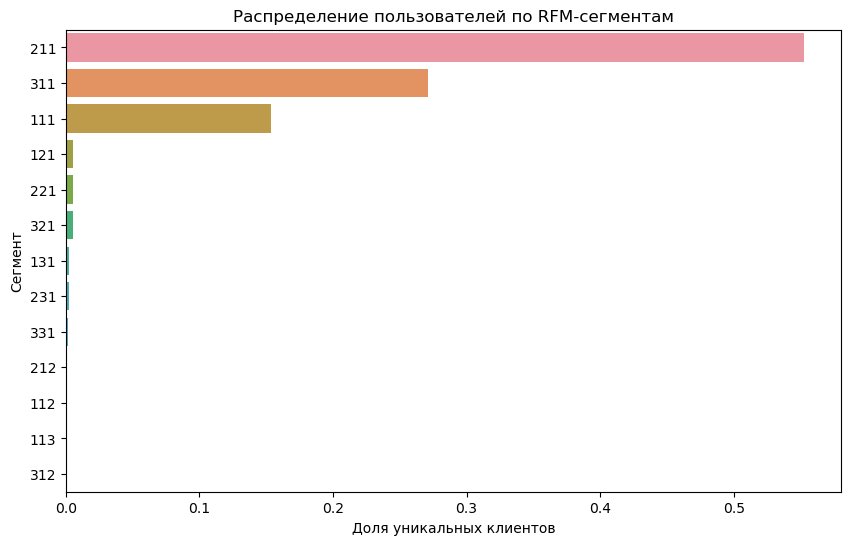

In [61]:
rfm_score_pivot = rfm_score_pivot.reset_index()
# создаем график, отображающий распределение пользователей в соответствии с RFM-сегментами
plt.figure(figsize = (10,6))
sns.barplot(x='ratio', y='rfm_score', data=rfm_score_pivot)
plt.title('Распределение пользователей по RFM-сегментам')
plt.xlabel('Доля уникальных клиентов')
plt.ylabel('Сегмент')
plt.show()

Можно выделить три основные группы покупателей: 211 (55%), 311 (27%) и 111 (15%). Для всех трех групп характерны наименьшие суммы платежей и низкая частота транзакций.

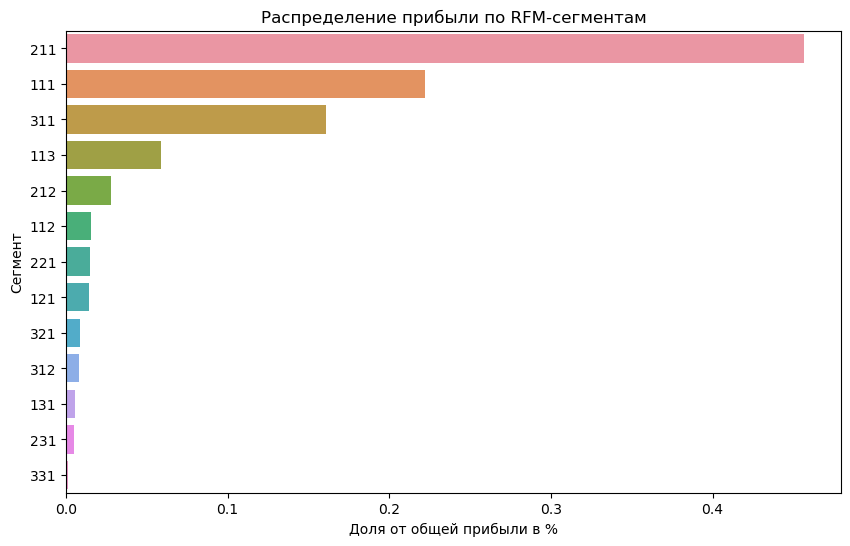

In [62]:
rfm_score_pivot = rfm_score_pivot.sort_values(by='ratio_of_sum', ascending=False)
# создаем график, отображающий распределение прибыли в соответствии с RFM-сегментами
plt.figure(figsize = (10,6))
sns.barplot(x='ratio_of_sum', y='rfm_score', data=rfm_score_pivot)
plt.title('Распределение прибыли по RFM-сегментам')
plt.xlabel('Доля от общей прибыли в %')
plt.ylabel('Сегмент')
plt.show()

Наибольшую прибыль также приносят сегменты: 211 (45%), 111 (22%) и 311 (16%).

 ## Когортный анализ.

Посчитаем **Retention Rate** - удержание пользователей.

In [63]:
df_paid['action_date'] = pd.to_datetime(df_paid['action_date'])

In [64]:
# функция для создания профилей
def get_profiles(df):

    profiles = (
        df.sort_values(by=['customer', 'action_date'])
        .groupby('customer')
        .agg({'action_date': 'first', 'type': 'first', 'aim': 'first'})
        .rename(columns={'action_date': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.date.astype('datetime64[M]')

    return profiles

In [65]:
# создаем профили
profiles = get_profiles(df_paid)
profiles

,customer,first_ts,type,aim,dt,month
0,****@bk.ru,2024-06-13 18:33:00,Оплата с созданием подписки,"Поддержите ""Простые вещи""",2024-06-13,2024-06-01
1,****@de.ru,2024-07-04 16:36:00,Оплата,"Поддержите ""Простые вещи""",2024-07-04,2024-07-01
2,****@eml.cc,2024-06-17 14:33:00,Оплата,"Поддержите ""Простые вещи""",2024-06-17,2024-06-01
3,****@gksnab.ru,2024-05-07 22:50:00,Оплата,"Поддержите ""Простые вещи""",2024-05-07,2024-05-01
4,****@gmail.com,2024-06-15 01:47:00,Оплата,"Поддержите ""Простые вещи""",2024-06-15,2024-06-01
...,...,...,...,...,...,...
1471,zotova.liuda****@yandex.ru,2024-06-26 11:51:00,Оплата,"Поддержите ""Простые вещи""",2024-06-26,2024-06-01
1472,zvon****@gmail.com,2024-06-24 01:38:00,Оплата,"Поддержите ""Простые вещи""",2024-06-24,2024-06-01
1473,zxc****@yandex.ru,2024-07-03 13:02:00,Регулярная оплата,"Поддержите ""Простые вещи""",2024-07-03,2024-07-01
1474,zxc2081@yandex.ru,2024-06-03 13:00:00,Оплата,"Поддержите ""Простые вещи""",2024-06-03,2024-06-01


In [66]:
# присоединяем df_paid к профилям по столбцу customer
result_raw = profiles.merge(
    df_paid[['customer', 'action_date']], on='customer', how='left'
)
result_raw

,customer,first_ts,type,aim,dt,month,action_date
0,****@bk.ru,2024-06-13 18:33:00,Оплата с созданием подписки,"Поддержите ""Простые вещи""",2024-06-13,2024-06-01,2024-06-13 18:33:00
1,****@de.ru,2024-07-04 16:36:00,Оплата,"Поддержите ""Простые вещи""",2024-07-04,2024-07-01,2024-07-04 16:36:00
2,****@eml.cc,2024-06-17 14:33:00,Оплата,"Поддержите ""Простые вещи""",2024-06-17,2024-06-01,2024-07-29 17:19:00
3,****@eml.cc,2024-06-17 14:33:00,Оплата,"Поддержите ""Простые вещи""",2024-06-17,2024-06-01,2024-06-17 14:33:00
4,****@gksnab.ru,2024-05-07 22:50:00,Оплата,"Поддержите ""Простые вещи""",2024-05-07,2024-05-01,2024-05-07 22:50:00
...,...,...,...,...,...,...,...
3321,zxc2081@yandex.ru,2024-06-03 13:00:00,Оплата,"Поддержите ""Простые вещи""",2024-06-03,2024-06-01,2024-06-03 13:01:00
3322,zxc2081@yandex.ru,2024-06-03 13:00:00,Оплата,"Поддержите ""Простые вещи""",2024-06-03,2024-06-01,2024-06-03 13:00:00
3323,zzzz****@mail.ru,2024-05-27 22:29:00,Оплата с созданием подписки,"Поддержите ""Простые вещи""",2024-05-27,2024-05-01,2024-07-27 22:30:00
3324,zzzz****@mail.ru,2024-05-27 22:29:00,Оплата с созданием подписки,"Поддержите ""Простые вещи""",2024-05-27,2024-05-01,2024-06-27 22:30:00


In [67]:
# вычисляем лайфтайм для каждой оплаты в месяцах
result_raw['lifetime'] = ((result_raw['action_date'] - result_raw['first_ts'])/np.timedelta64(1, 'M')).astype(int)
result_raw.head(5)

,customer,first_ts,type,aim,dt,month,action_date,lifetime
0,****@bk.ru,2024-06-13 18:33:00,Оплата с созданием подписки,"Поддержите ""Простые вещи""",2024-06-13,2024-06-01,2024-06-13 18:33:00,0
1,****@de.ru,2024-07-04 16:36:00,Оплата,"Поддержите ""Простые вещи""",2024-07-04,2024-07-01,2024-07-04 16:36:00,0
2,****@eml.cc,2024-06-17 14:33:00,Оплата,"Поддержите ""Простые вещи""",2024-06-17,2024-06-01,2024-07-29 17:19:00,1
3,****@eml.cc,2024-06-17 14:33:00,Оплата,"Поддержите ""Простые вещи""",2024-06-17,2024-06-01,2024-06-17 14:33:00,0
4,****@gksnab.ru,2024-05-07 22:50:00,Оплата,"Поддержите ""Простые вещи""",2024-05-07,2024-05-01,2024-05-07 22:50:00,0


In [68]:
# строим таблицу удержания
result_grouped = result_raw.pivot_table(
    index=['month'], columns='lifetime', values='customer', aggfunc='nunique'
)

result_grouped

lifetime,0,1,2,3,4,5,6
month,,,,,,,
2024-01-01,251.0,238.0,203.0,208.0,161.0,200.0,23.0
2024-02-01,12.0,8.0,9.0,6.0,6.0,1.0,NaN
2024-03-01,52.0,12.0,15.0,10.0,9.0,NaN,NaN
2024-04-01,42.0,5.0,13.0,1.0,NaN,NaN,NaN
2024-05-01,275.0,92.0,89.0,NaN,NaN,NaN,NaN
2024-06-01,698.0,6.0,NaN,NaN,NaN,NaN,NaN
2024-07-01,146.0,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# вычисляем размеры когорт
cohort_sizes = (
    result_raw.groupby('month')
    .agg({'customer': 'nunique'})
    .rename(columns={'customer': 'cohort_size'})
)

cohort_sizes

,cohort_size
month,
2024-01-01,251
2024-02-01,12
2024-03-01,52
2024-04-01,42
2024-05-01,275
2024-06-01,698
2024-07-01,146


In [70]:
# объединяем размеры когорт и таблицу удержания
result_grouped_1 = cohort_sizes.merge(
    result_grouped, on='month', how='left'
).fillna(0)

result_grouped_1

,cohort_size,0,1,2,3,4,5,6
month,,,,,,,,
2024-01-01,251,251.0,238.0,203.0,208.0,161.0,200.0,23.0
2024-02-01,12,12.0,8.0,9.0,6.0,6.0,1.0,0.0
2024-03-01,52,52.0,12.0,15.0,10.0,9.0,0.0,0.0
2024-04-01,42,42.0,5.0,13.0,1.0,0.0,0.0,0.0
2024-05-01,275,275.0,92.0,89.0,0.0,0.0,0.0,0.0
2024-06-01,698,698.0,6.0,0.0,0.0,0.0,0.0,0.0
2024-07-01,146,146.0,0.0,0.0,0.0,0.0,0.0,0.0


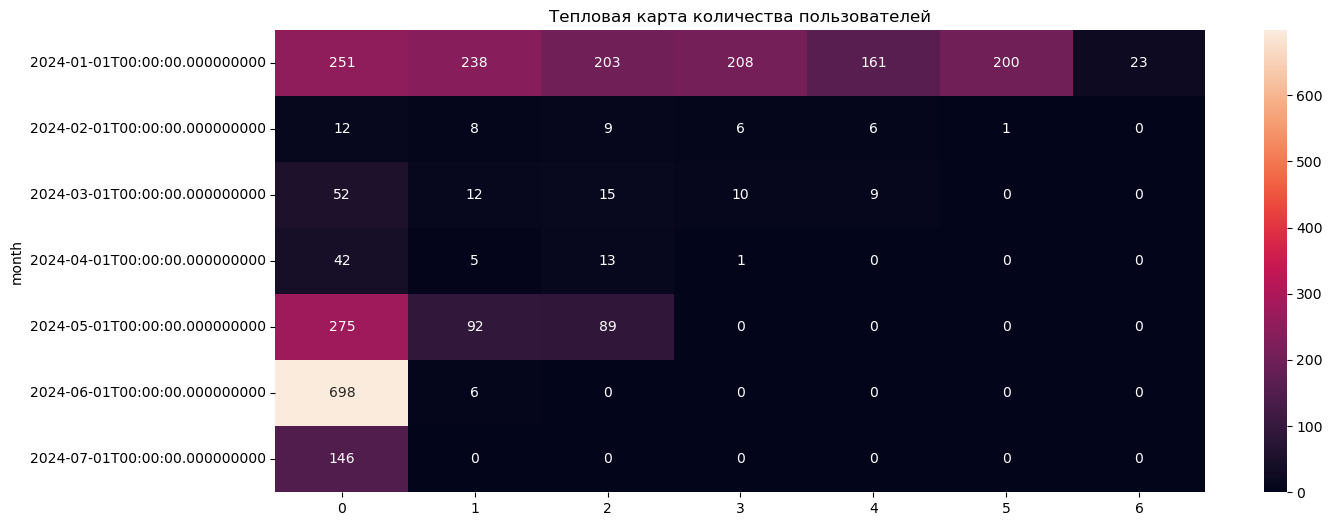

In [71]:
# строим хитмэп 

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    result_grouped_1.drop(columns=['cohort_size']),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.0f',
)

plt.title('Тепловая карта количества пользователей')  # название графика
plt.show()

В первый день жизни самая многочисленная когорта - июньская (698 пользователей). Самые малочисленные когорты: февраль, март и апрель (12, 52 и 42 пользователей соответственно).

In [72]:
# делим число удержанных пользователей на размер когорты
retention_rate = result_grouped_1.div(result_grouped_1['cohort_size'], axis=0).drop(columns=['cohort_size'])
retention_rate

,0,1,2,3,4,5,6
month,,,,,,,
2024-01-01,1.0,0.948207,0.808765,0.828685,0.641434,0.796813,0.091633
2024-02-01,1.0,0.666667,0.750000,0.500000,0.500000,0.083333,0.000000
2024-03-01,1.0,0.230769,0.288462,0.192308,0.173077,0.000000,0.000000
2024-04-01,1.0,0.119048,0.309524,0.023810,0.000000,0.000000,0.000000
2024-05-01,1.0,0.334545,0.323636,0.000000,0.000000,0.000000,0.000000
2024-06-01,1.0,0.008596,0.000000,0.000000,0.000000,0.000000,0.000000
2024-07-01,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


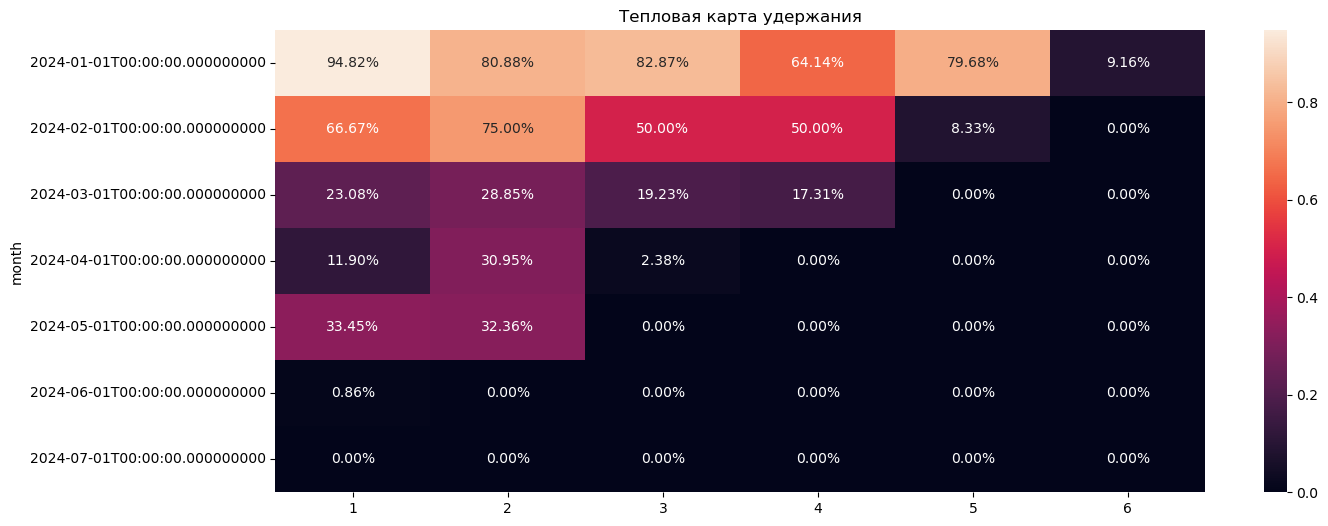

In [73]:
# строим хитмэп без нулевого лайфтайма

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    retention_rate.drop(columns=[0]),  # удаляем лишние столбцы
    annot=True,  # включаем подписи
    fmt='.2%',  # переводим значения в проценты
)
plt.title('Тепловая карта удержания')  # название графика
plt.show()

Самый лучший показатель удержания пользователей у первой когорты (январь). Далее этот показатель снижается.

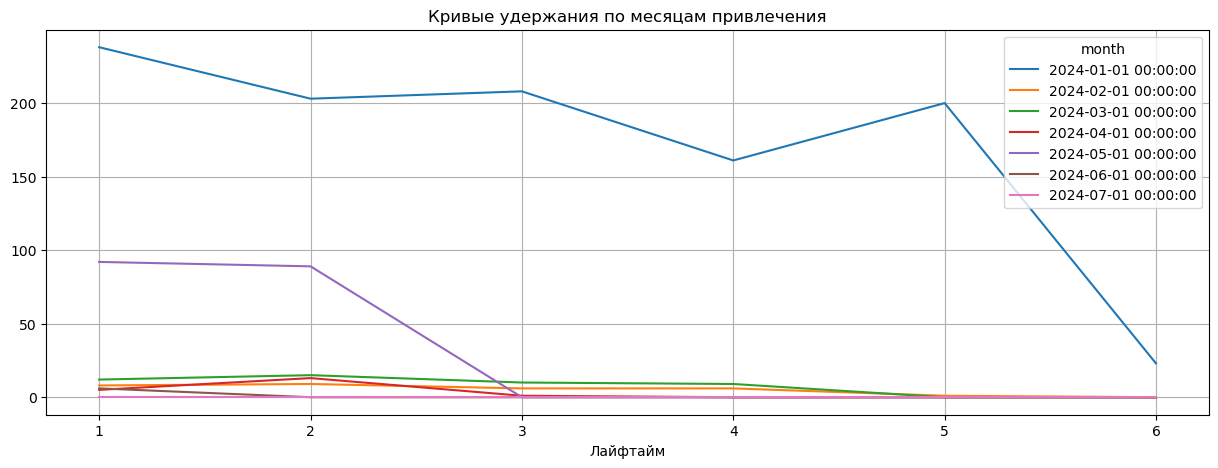

In [74]:
# строим кривые удержания

report = result_grouped_1.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по месяцам привлечения')  # название графика
plt.show()

Лучшее удержание пользователей у январской и майской когорт. 

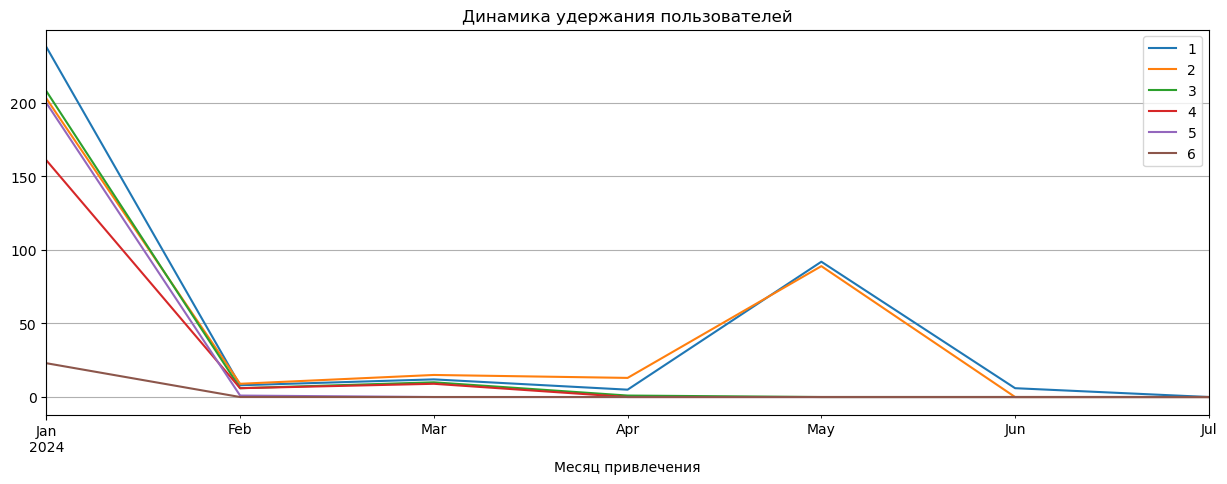

In [75]:
# строим графики изменений

report = result_grouped_1.drop(columns=['cohort_size', 0])

report.plot(grid=True, figsize=(15, 5))
plt.xlabel('Месяц привлечения')
plt.title('Динамика удержания пользователей')
plt.show()

Динамика удержания 1ого и 2ого дня резко упала для когорт, привлеченных после февраля. Была небольшая положительная динамика в мае.

Посчитаем ltv или **Lifetime Value** — пожизненная ценность клиента. 

In [76]:
# присоединяем df_paid к профилям по столбцу customer
result_raw = profiles.merge(
    df_paid[['customer', 'action_date', 'operation_sum']], on='customer', how='left'
)
result_raw

,customer,first_ts,type,aim,dt,month,action_date,operation_sum
0,****@bk.ru,2024-06-13 18:33:00,Оплата с созданием подписки,"Поддержите ""Простые вещи""",2024-06-13,2024-06-01,2024-06-13 18:33:00,1000
1,****@de.ru,2024-07-04 16:36:00,Оплата,"Поддержите ""Простые вещи""",2024-07-04,2024-07-01,2024-07-04 16:36:00,1000
2,****@eml.cc,2024-06-17 14:33:00,Оплата,"Поддержите ""Простые вещи""",2024-06-17,2024-06-01,2024-07-29 17:19:00,500
3,****@eml.cc,2024-06-17 14:33:00,Оплата,"Поддержите ""Простые вещи""",2024-06-17,2024-06-01,2024-06-17 14:33:00,1000
4,****@gksnab.ru,2024-05-07 22:50:00,Оплата,"Поддержите ""Простые вещи""",2024-05-07,2024-05-01,2024-05-07 22:50:00,2500
...,...,...,...,...,...,...,...,...
3321,zxc2081@yandex.ru,2024-06-03 13:00:00,Оплата,"Поддержите ""Простые вещи""",2024-06-03,2024-06-01,2024-06-03 13:01:00,500
3322,zxc2081@yandex.ru,2024-06-03 13:00:00,Оплата,"Поддержите ""Простые вещи""",2024-06-03,2024-06-01,2024-06-03 13:00:00,7000
3323,zzzz****@mail.ru,2024-05-27 22:29:00,Оплата с созданием подписки,"Поддержите ""Простые вещи""",2024-05-27,2024-05-01,2024-07-27 22:30:00,100
3324,zzzz****@mail.ru,2024-05-27 22:29:00,Оплата с созданием подписки,"Поддержите ""Простые вещи""",2024-05-27,2024-05-01,2024-06-27 22:30:00,100


In [77]:
# добавляем столбец с лайфтаймом
result_raw['lifetime'] = ((result_raw['action_date'] - result_raw['first_ts'])/np.timedelta64(1, 'M')).astype(int)
result_raw.head(5)

,customer,first_ts,type,aim,dt,month,action_date,operation_sum,lifetime
0,****@bk.ru,2024-06-13 18:33:00,Оплата с созданием подписки,"Поддержите ""Простые вещи""",2024-06-13,2024-06-01,2024-06-13 18:33:00,1000,0
1,****@de.ru,2024-07-04 16:36:00,Оплата,"Поддержите ""Простые вещи""",2024-07-04,2024-07-01,2024-07-04 16:36:00,1000,0
2,****@eml.cc,2024-06-17 14:33:00,Оплата,"Поддержите ""Простые вещи""",2024-06-17,2024-06-01,2024-07-29 17:19:00,500,1
3,****@eml.cc,2024-06-17 14:33:00,Оплата,"Поддержите ""Простые вещи""",2024-06-17,2024-06-01,2024-06-17 14:33:00,1000,0
4,****@gksnab.ru,2024-05-07 22:50:00,Оплата,"Поддержите ""Простые вещи""",2024-05-07,2024-05-01,2024-05-07 22:50:00,2500,0


In [78]:
# строим таблицу ltv
result = result_raw.pivot_table(
        index=['month'],
        columns='lifetime',
        values='operation_sum',  # в ячейках — выручка за каждый лайфтайм
        aggfunc='sum',
        )
    
result

lifetime,0,1,2,3,4,5,6
month,,,,,,,
2024-01-01,133414.0,223028.0,102675.0,130275.0,109420.0,125652.0,23138.0
2024-02-01,9400.0,4150.0,4250.0,3650.0,2750.0,1000.0,NaN
2024-03-01,185281.0,17261.0,36283.0,6911.0,13100.0,NaN,NaN
2024-04-01,123310.0,2404.0,9199.0,20000.0,NaN,NaN,NaN
2024-05-01,225357.0,52350.0,43700.0,NaN,NaN,NaN,NaN
2024-06-01,757005.0,3000.0,NaN,NaN,NaN,NaN,NaN
2024-07-01,172189.0,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# заполняем ячейки с NaN
result_1 = result.fillna(0).cumsum(axis=1)
result_1

lifetime,0,1,2,3,4,5,6
month,,,,,,,
2024-01-01,133414.0,356442.0,459117.0,589392.0,698812.0,824464.0,847602.0
2024-02-01,9400.0,13550.0,17800.0,21450.0,24200.0,25200.0,25200.0
2024-03-01,185281.0,202542.0,238825.0,245736.0,258836.0,258836.0,258836.0
2024-04-01,123310.0,125714.0,134913.0,154913.0,154913.0,154913.0,154913.0
2024-05-01,225357.0,277707.0,321407.0,321407.0,321407.0,321407.0,321407.0
2024-06-01,757005.0,760005.0,760005.0,760005.0,760005.0,760005.0,760005.0
2024-07-01,172189.0,172189.0,172189.0,172189.0,172189.0,172189.0,172189.0


In [80]:
# добавляем к таблице ltv размеры когорт
result_grouped_2 = cohort_sizes.merge(
    result_1, on='month', how='left'
).fillna(0)

result_grouped_2

,cohort_size,0,1,2,3,4,5,6
month,,,,,,,,
2024-01-01,251,133414.0,356442.0,459117.0,589392.0,698812.0,824464.0,847602.0
2024-02-01,12,9400.0,13550.0,17800.0,21450.0,24200.0,25200.0,25200.0
2024-03-01,52,185281.0,202542.0,238825.0,245736.0,258836.0,258836.0,258836.0
2024-04-01,42,123310.0,125714.0,134913.0,154913.0,154913.0,154913.0,154913.0
2024-05-01,275,225357.0,277707.0,321407.0,321407.0,321407.0,321407.0,321407.0
2024-06-01,698,757005.0,760005.0,760005.0,760005.0,760005.0,760005.0,760005.0
2024-07-01,146,172189.0,172189.0,172189.0,172189.0,172189.0,172189.0,172189.0


In [81]:
# делим прибыль на размер когорт
ltv = result_grouped_2.div(result_grouped_2['cohort_size'], axis=0).astype(int)
ltv

,cohort_size,0,1,2,3,4,5,6
month,,,,,,,,
2024-01-01,1,531,1420,1829,2348,2784,3284,3376
2024-02-01,1,783,1129,1483,1787,2016,2100,2100
2024-03-01,1,3563,3895,4592,4725,4977,4977,4977
2024-04-01,1,2935,2993,3212,3688,3688,3688,3688
2024-05-01,1,819,1009,1168,1168,1168,1168,1168
2024-06-01,1,1084,1088,1088,1088,1088,1088,1088
2024-07-01,1,1179,1179,1179,1179,1179,1179,1179


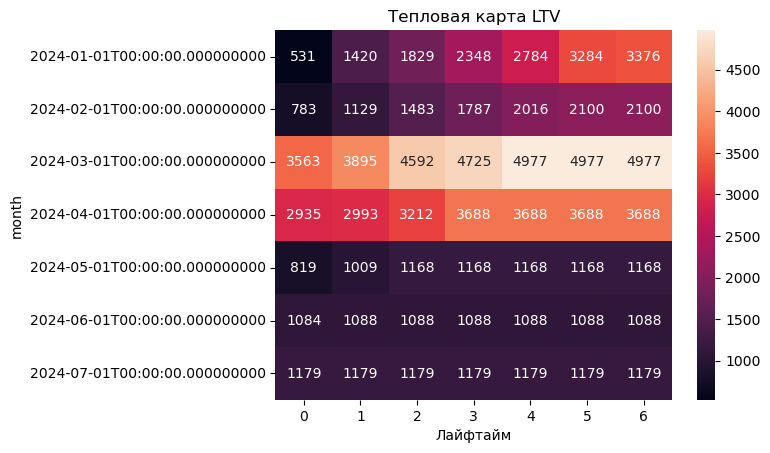

In [82]:
# строим хитмэп таблицы ltv
sns.heatmap(ltv.drop(columns=['cohort_size']), annot=True, fmt='d')
plt.title('Тепловая карта LTV')
plt.xlabel('Лайфтайм')
plt.show()

Лучшие показатели ltv демонстрируют мартовская и апрельская когорты.

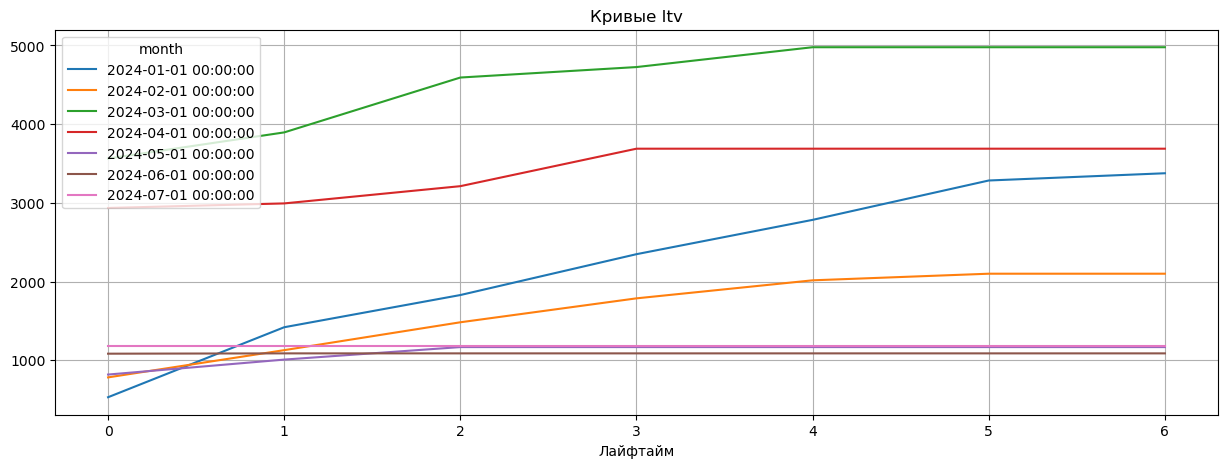

In [83]:
# строим кривые ltv

report = ltv.drop(columns = ['cohort_size'])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые ltv')  # название графика
plt.show()

Наилучшая динамика ltv у мартовской, апрельской и январской когорт.

Посчитаем **средний чек** для когорт.

In [84]:
# строим сводную таблицу средних чеков 
average_receipt = round(result.div(result_grouped))
average_receipt

lifetime,0,1,2,3,4,5,6
month,,,,,,,
2024-01-01,532.0,937.0,506.0,626.0,680.0,628.0,1006.0
2024-02-01,783.0,519.0,472.0,608.0,458.0,1000.0,NaN
2024-03-01,3563.0,1438.0,2419.0,691.0,1456.0,NaN,NaN
2024-04-01,2936.0,481.0,708.0,20000.0,NaN,NaN,NaN
2024-05-01,819.0,569.0,491.0,NaN,NaN,NaN,NaN
2024-06-01,1085.0,500.0,NaN,NaN,NaN,NaN,NaN
2024-07-01,1179.0,NaN,NaN,NaN,NaN,NaN,NaN


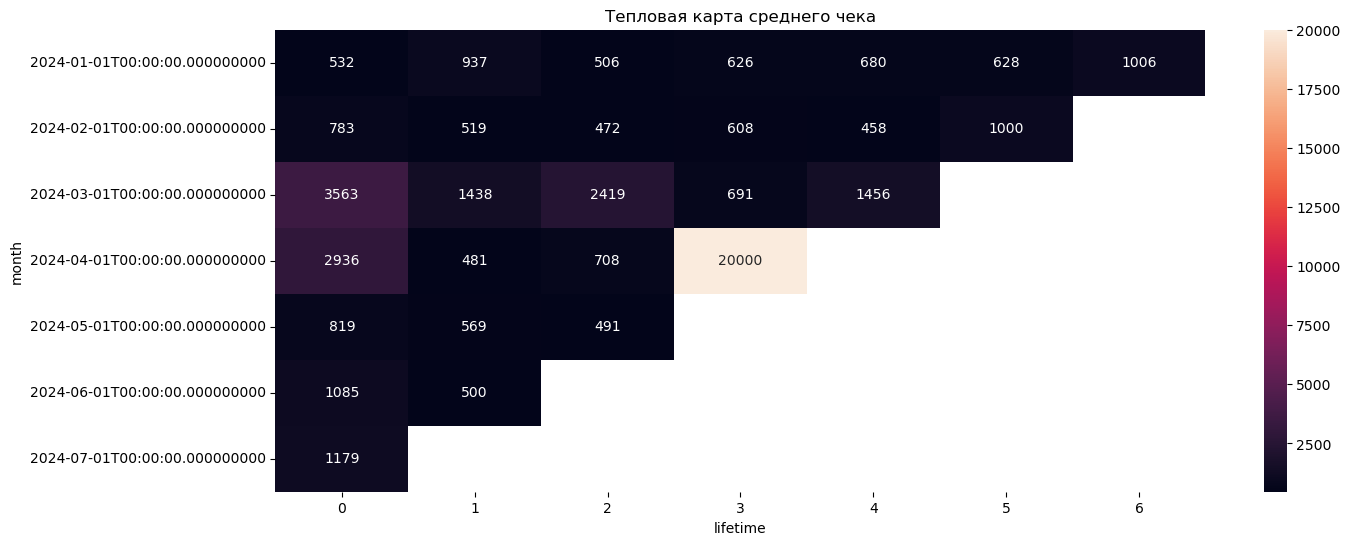

In [85]:
# строим хитмэп среднего чека

plt.figure(figsize=(15, 6))  # задаём размер графика
sns.heatmap(
    average_receipt,  
    annot=True,  
    fmt='.0f'
)
plt.title('Тепловая карта среднего чека')  # название графика
plt.show()

Самые высокие средние чеки в мартовской и апрельской когортах.

## Маркетинговый анализ.

Для расчета *DAU, WAU и MAU* добавим в датафрейм столбцы с указанием дня, номера недели и месяца для каждой транзакции.

In [86]:
df['month'] = df['action_date'].dt.month # добавляем месяц
df['week'] = df['action_date'].dt.isocalendar().week # добавляем неделю
df['date'] = df['action_date'].dt.date # добавляем день

df

,id,action_date,bank,site,order_id,customer,type,operation_sum,operation_currency,comission_sum,final_sum,final_currency,status,aim,comission_perc,payment_system,issuer,adress,note,file,city,subscription,payment_method,sub,month,week,date
0,2111165778,2024-04-30 22:18:00,Тинькофф,prostieveschi.ru,nan,tigro****@gmail.com,Регулярная оплата,200,RUB,6.4,193.6,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MIR,Tinkoff Bank,prostieveschi.ru,approved,апрель.xls,NaN,NaN,NaN,нет подписки,4.0,18,2024-04-30
1,2111146897,2024-04-30 20:18:00,Тинькофф,prostieveschi.ru,nan,12ost****@mail.ru,Регулярная оплата,1000,RUB,32.0,968.0,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Alfa-Bank,prostieveschi.ru,approved,апрель.xls,NaN,NaN,NaN,нет подписки,4.0,18,2024-04-30
2,2111124178,2024-04-30 18:17:00,Тинькофф,prostieveschi.ru,17464423.0,lakoni****@mail.ru,Оплата,100,RUB,NaN,NaN,RUB,Отклонена,Пожертвование на ведение уставной деятельности,0.0,MIR,Sberbank,prostieveschi.ru,checkresponseserviceunavailable,апрель.xls,NaN,NaN,NaN,нет подписки,4.0,18,2024-04-30
3,2111085421,2024-04-30 14:54:00,Тинькофф,prostieveschi.ru,nan,nat****@gmail.com,Регулярная оплата,300,RUB,9.6,290.4,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Tinkoff Bank,prostieveschi.ru,approved,апрель.xls,NaN,NaN,NaN,нет подписки,4.0,18,2024-04-30
4,2111083746,2024-04-30 14:44:00,Тинькофф,prostieveschi.ru,nan,natalk****@inbox.ru,Регулярная оплата,700,RUB,22.4,677.6,RUB,Завершена,"Поддержите ""Простые вещи""",3.2,MasterCard,Tinkoff Bank,prostieveschi.ru,approved,апрель.xls,NaN,NaN,NaN,нет подписки,4.0,18,2024-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2067914701,NaT,Тинькофф,prostieveschi.ru,nan,ett****@yandex.ru,Регулярная оплата,500,NaN,0.5,-0.5,RUB,Отклонена,не определен,3.2,NaN,NaN,NaN,NaN,январь.xls,NaN,NaN,NaN,нет подписки,NaN,<NA>,NaN
331,2067672633,NaT,Тинькофф,prostieveschi.ru,nan,elmira22****@gmail.com,Регулярная оплата,100,NaN,0.5,-0.5,RUB,Отклонена,не определен,3.2,NaN,NaN,NaN,NaN,январь.xls,NaN,NaN,NaN,нет подписки,NaN,<NA>,NaN
332,2067494163,NaT,Тинькофф,prostieveschi.ru,nan,ett****@yandex.ru,Регулярная оплата,500,NaN,0.5,-0.5,RUB,Отклонена,не определен,3.2,NaN,NaN,NaN,NaN,январь.xls,NaN,NaN,NaN,нет подписки,NaN,<NA>,NaN
333,2067091792,NaT,Тинькофф,prostieveschi.ru,nan,ett****@yandex.ru,Регулярная оплата,500,NaN,0.5,-0.5,RUB,Отклонена,не определен,3.2,NaN,NaN,NaN,NaN,январь.xls,NaN,NaN,NaN,нет подписки,NaN,<NA>,NaN


Считаем dau, wau и mau.

In [87]:
dau_total = (
    df.groupby('date')
    .agg({'customer': 'nunique'})
    .mean()
)

wau_total = (
    df.groupby('week')
    .agg({'customer': 'nunique'})
    .mean()
)

mau_total = (
    df.groupby('month')
    .agg({'customer': 'nunique'})
    .mean()
)

print('\nПоказатель DAU:', int(dau_total))
print('\nПоказатель WAU:', int(wau_total))
print('\nПоказатель MAU:', int(mau_total))


Показатель DAU: 17

Показатель WAU: 111

Показатель MAU: 475


Считаем *sticky factor (коэффициент «липучести»)*.

In [88]:
sticky_factor = dau_total / mau_total * 100
sticky_factor

customer    3.736319
dtype: float64

Sticky factor равен примерно 3 %. Это низкий показатель.

Посмотрим динамику количества уникальных пользователей по месяцам и неделям.

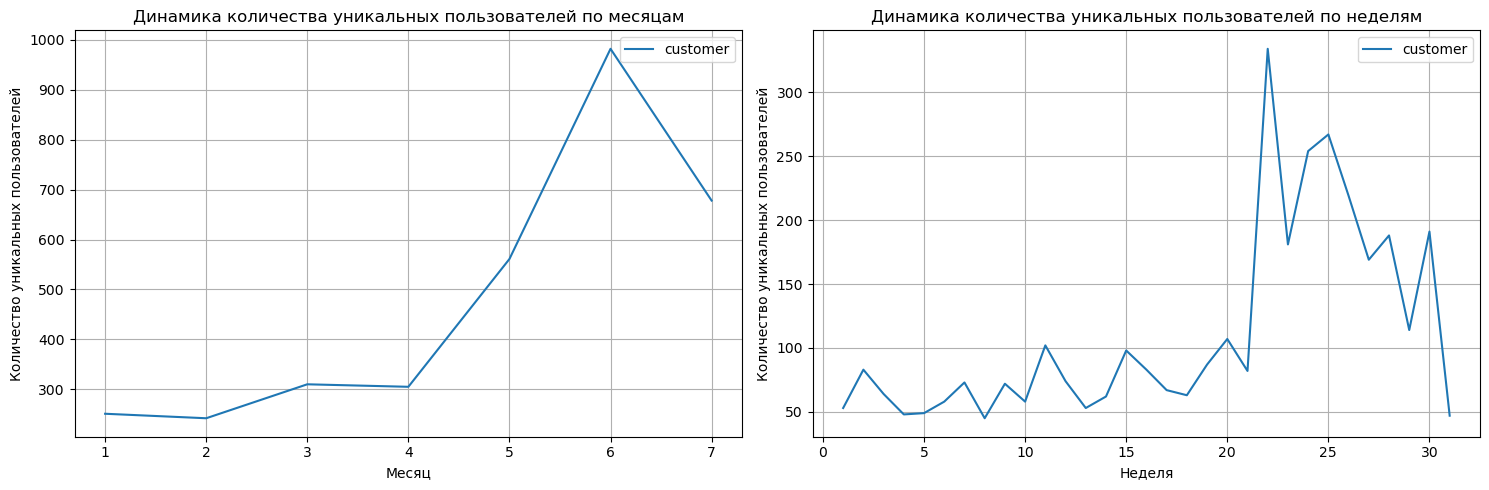

In [89]:
# устанавливаем размер сетки для графиков
plt.figure(figsize = (15,5))

# график 1
ax1 = plt.subplot(1,2,1)
df_pivot = df.pivot_table(index='month', values = 'customer', aggfunc='nunique')
df_pivot.plot(grid=True, ax = ax1)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Количество уникальных пользователей')
plt.title('Динамика количества уникальных пользователей по месяцам')

# график 2
ax2 = plt.subplot(1,2,2)
df_pivot = df.pivot_table(index='week', values = 'customer', aggfunc='nunique')
df_pivot.plot(grid=True, ax = ax2)
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Количество уникальных пользователей')
plt.title('Динамика количества уникальных пользователей по неделям')

plt.tight_layout()
plt.show()

С января по апрель количество пользователей росло плавно, затем был резкий скачок до июня (22 неделя), в июле количество уникальных пользователей стало резко падать.

## Выводы.

В ходе данного исследования был проведен анализ привлечения и удержания пользователей АНО "Простые вещи". 

За период с января по июль 2024 года было зарегистрировано 1525 пользователей и 4147 транзакций на сумму около 2,46 млн рублей. Основная часть платежей — регулярные (69%), основная цель - "Поддержите 'Простые вещи'" (около 82%). Наибольшее количество транзакций совершается в Москве и Санкт-Петербурге (31% и 24%), а около 70% платежей осуществляют пользователи без подписки.

Наиболее распространенный интервал между платежами — от 30 до 60 дней, а среднее число платежей в месяц — от 0.25 до 1. Самая частая сумма покупок — до 5000 рублей. Далее был произведен RFM-анализ для выявления ключевых клиентов, которые приносят компании большую часть прибыли.  Были выделены три основные группы покупателей: 211 (55%), 311 (27%) и 111 (15%), для которых характерны низкие суммы платежей и редкая частота транзакций.

На следующем этапе был проведен когортный анализ. Наиболее крупная когорта — июньская (698 пользователей), а наименьшие — февраль, март и апрель (12, 52 и 42 пользователя соответственно). Лучшие показатели удержания пользователей демонстрирует январская когорта, затем показатели снижаются. Динамика удержания на 1-й и 2-й день резко снизилась для когорт, привлеченных после февраля, с небольшим улучшением в мае. Лучшие показатели LTV и средние чеки показывают мартовская и апрельская когорты.

Согласно проведенному маркетинговому анализу было выявлено, что с января по апрель число пользователей увеличивалось постепенно, после чего произошел резкий скачок в июне (22 неделя), в июле количество уникальных пользователей значительно снизилось.